In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import timezone
%matplotlib inline


import warnings
warnings.simplefilter("ignore")

#     sql = "SELECT * FROM aws_mysql_tables.iphone_data"
#     project_id = "teak-hearth-316213"
#     df = pd.read_gbq(sql, project_id=project_id)

def load_data():
    df = pd.read_pickle("data.pkl")
    return df

df = load_data()


# 初期分析

* フリマによる価格の違いはほとんどないといえるか
    - ３社の価格分布の差はほとんどない。中央値を中心に釣鐘状の正規分布している
* スマートフォンの価格は時間経過とともに緩やかに下降している
    - トレンドとしては価格下落の傾向、2020年の８月以降で下落が激しいのは新機種発表による影響か
    - iphoneSEはSE2機種が混在してデータがとれているため、上昇グラフになっているかと思われる
    - iphone6以前の機種が逆に高くなっているのは何か理由があるのか
    - 2021年5月下旬に価格変動が見られる。。理由の考察が必要
* 新機種の発売にともない、旧機種の出品数の増加、価格の下落が起きている


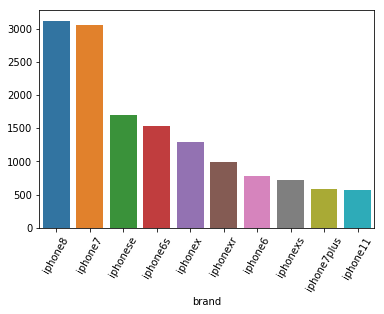

In [396]:
# 直近n日の取引件数ランキング
date_of_30_days_before = (datetime.datetime.now() - datetime.timedelta(days=30)).strftime("%Y-%m-%d")
date_of_60_days_before = (datetime.datetime.now() - datetime.timedelta(days=60)).strftime("%Y-%m-%d")
date_of_90_days_before = (datetime.datetime.now() - datetime.timedelta(days=90)).strftime("%Y-%m-%d")

sales_counts_top10 = df[df["sales_date"] >= date_of_30_days_before].groupby(["brand"]).count()["sales_date"].sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
sns.barplot(sales_counts_top10.index, sales_counts_top10.values, ax=ax)
ax.xaxis.set_tick_params(rotation=60)

In [542]:
data = df[df["sales_date"] >= date_of_30_days_before] \
      .set_index("sales_date") \
      .groupby(["brand"]) \
      .resample("1D") \
      .count()[["data_type"]].reset_index()


pd.pivot_table(data, index="brand", columns="sales_date").fillna(0).stack().groupby(level=0).cumsum()

data_type
brand       sales_date                          
iphone11    2021-05-17 00:00:00+00:00        0.0
            2021-05-18 00:00:00+00:00        0.0
            2021-05-19 00:00:00+00:00        0.0
            2021-05-20 00:00:00+00:00        1.0
            2021-05-21 00:00:00+00:00        2.0
            2021-05-22 00:00:00+00:00        2.0
            2021-05-23 00:00:00+00:00        2.0
            2021-05-24 00:00:00+00:00        5.0
            2021-05-25 00:00:00+00:00       28.0
            2021-05-26 00:00:00+00:00       56.0
            2021-05-27 00:00:00+00:00       77.0
            2021-05-28 00:00:00+00:00       98.0
            2021-05-29 00:00:00+00:00      171.0
            2021-05-30 00:00:00+00:00      207.0
            2021-05-31 00:00:00+00:00      229.0
            2021-06-01 00:00:00+00:00      263.0
            2021-06-02 00:00:00+00:00      304.0
            2021-06-03 00:00:00+00:00      338.0
            2021-06-04 00:00:00+00:00      373.0
            2021-06-05 00:00:00+00:00      404.0
            2021-06-06 00:00:00+00:00      438.0
            2021-06-07 00:00:00+00:00      464.0
            2021-06-08 00:00:00+00:00      496.0
            2021-06-09 00:00:00+00:00      517.0
            2021-06-10 00:00:00+00:00      544.0
            2021-06-11 00:00:00+00:00      562.0
            2021-06-12 00:00:00+00:00      567.0
            2021-06-13 00:00:00+00:00      575.0
iphone11pro 2021-05-17 00:00:00+00:00        0.0
            2021-05-18 00:00:00+00:00        0.0
...                                          ...
iphonexs    2021-06-12 00:00:00+00:00      717.0
            2021-06-13 00:00:00+00:00      723.0
iphonexsmax 2021-05-17 00:00:00+00:00        0.0
            2021-05-18 00:00:00+00:00        0.0
            2021-05-19 00:00:00+00:00        0.0
            2021-05-20 00:00:00+00:00        0.0
            2021-05-21 00:00:00+00:00        0.0
            2021-05-22 00:00:00+00:00        0.0
            2021-05-23 00:00:00+00:00        0.0
            2021-05-24 00:00:00+00:00        1.0
            2021-05-25 00:00:00+00:00       10.0
            2021-05-26 00:00:00+00:00       26.0
            2021-05-27 00:00:00+00:00       44.0
            2021-05-28 00:00:00+00:00       60.0
            2021-05-29 00:00:00+00:00      101.0
            2021-05-30 00:00:00+00:00      109.0
            2021-05-31 00:00:00+00:00      123.0
            2021-06-01 00:00:00+00:00      152.0
            2021-06-02 00:00:00+00:00      172.0
            2021-06-03 00:00:00+00:00      195.0
            2021-06-04 00:00:00+00:00      208.0
            2021-06-05 00:00:00+00:00      238.0
            2021-06-06 00:00:00+00:00      262.0
            2021-06-07 00:00:00+00:00      282.0
            2021-06-08 00:00:00+00:00      310.0
            2021-06-09 00:00:00+00:00      327.0
            2021-06-10 00:00:00+00:00      345.0
            2021-06-11 00:00:00+00:00      350.0
            2021-06-12 00:00:00+00:00      353.0
            2021-06-13 00:00:00+00:00      359.0

[756 rows x 1 columns]

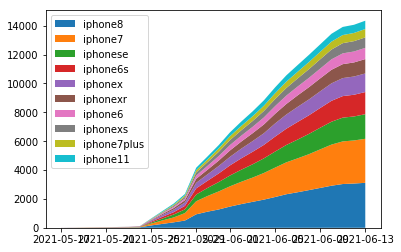

In [552]:
data = df[df["sales_date"] >= date_of_30_days_before] \
      .set_index("sales_date") \
      .groupby(["brand"]) \
      .resample("1D") \
      .count()[["data_type"]]

cumsum =  pd.pivot_table(data, index="brand", columns="sales_date").fillna(0).stack().groupby(level=0).cumsum()

top10_brands = sales_counts_top10.index
area_plot_data = []

for brand in top10_brands:
    area_plot_data.append(cumsum.loc[brand]["data_type"].tolist())
plt.stackplot(cumsum.loc[brand].index, area_plot_data, labels=top10_brands)
plt.legend(loc = 'upper left')


brand
iphone7           7344
iphone8           7241
iphonese          4119
iphone6s          3557
iphonex           3098
iphonexr          2293
iphone6           1753
iphonexs          1618
iphone11          1385
iphone7plus       1376
iphone8plus       1224
iphone12mini       918
iphonese2          897
iphonexsmax        828
iphone11pro        755
iphone12           565
iphone12promax     556
iphone6plus        483
iphone6splus       444
iphone12pro        410
iphone11promax     386
iphone5s           367
iphone5             72
iphone5c            40
iphone4s            26
iphone4              7
iphone3g             6
iphone3gs            5
Name: data_type, dtype: int64

In [275]:
# 取引件数ベースで昨月比
sales_counts_1  = df[(df["sales_date"] >= date_of_60_days_before) & (df["sales_date"] < date_of_30_days_before)].groupby(["brand"]).count()[["sales_date"]]
sales_counts_2  = df[(df["sales_date"] >= date_of_30_days_before)].groupby(["brand"]).count()[["sales_date"]]
compare_sales_counts = pd.concat([sales_counts_1, sales_counts_2], axis=1).fillna(0)
compare_sales_counts.columns = ["current_month", "last_month"]

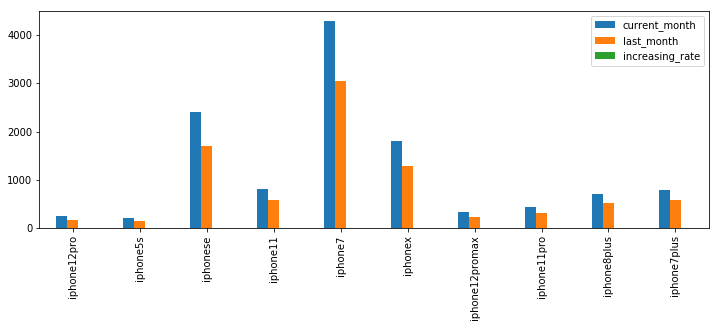

In [276]:
compare_sales_counts = compare_sales_counts[compare_sales_counts["current_month"] >= 100]
compare_sales_counts["increasing_rate"] = (compare_sales_counts["current_month"] / compare_sales_counts["last_month"]) - 1.00
compare_sales_counts.sort_values(by="increasing_rate", ascending=False)[:10].plot.bar(figsize=(12,4))

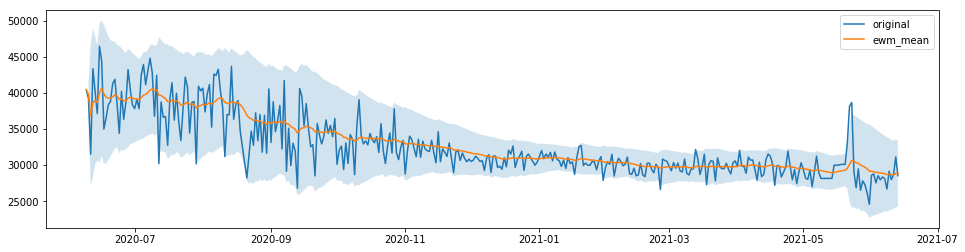

In [354]:
brand = "iphonex"
start_date = "2020-06-01"

brand_data = df[df["sales_date"] >= start_date]
plot_data = brand_data[brand_data["brand"] == brand][["sales_date", "price"]].set_index("sales_date")
plot_data = plot_data.resample("1D").mean().fillna(method="ffill")

def ewm_line_plot(ts, span=30, threshold=2.0):
    fig, ax = plt.subplots(figsize=(16, 4))

    ewm_mean = ts.ewm(span=span).mean()
    ewm_std  = ts.ewm(span=span).std()
    ax.plot(ts, label="original")
    ax.plot(ewm_mean, label="ewm_mean")

    ax.fill_between(ts.index,
                    (ewm_mean + ewm_std * threshold).values.reshape(-1),
                    (ewm_mean - ewm_std * threshold).values.reshape(-1),
                    alpha=0.2
                   )

    plt.legend()
    plt.show()
    
ewm_line_plot(plot_data)

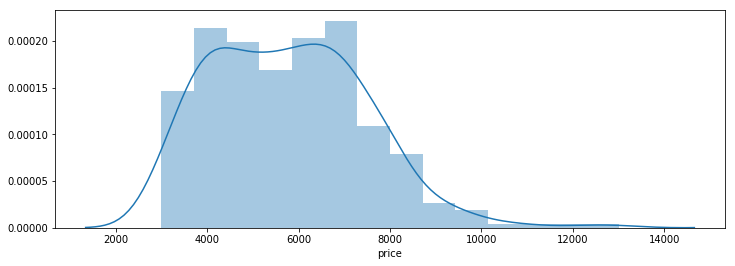

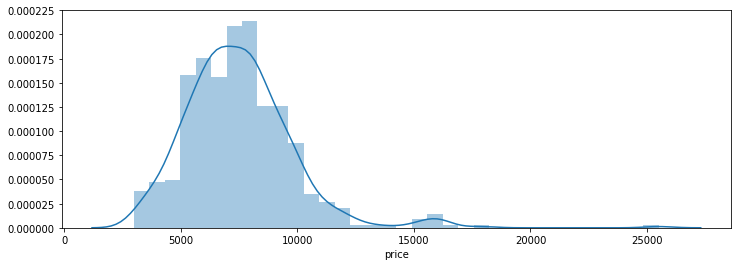

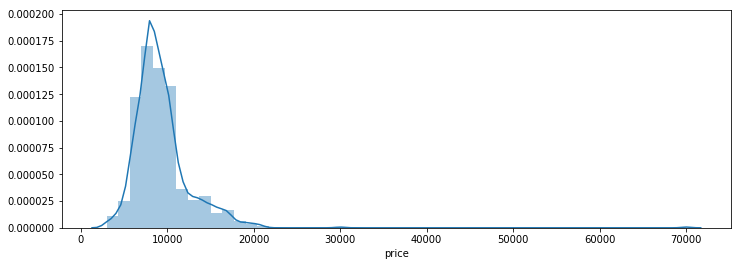

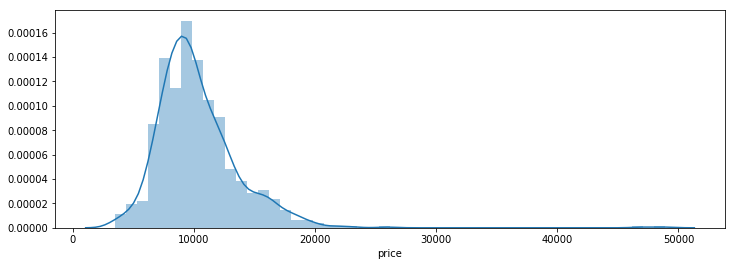

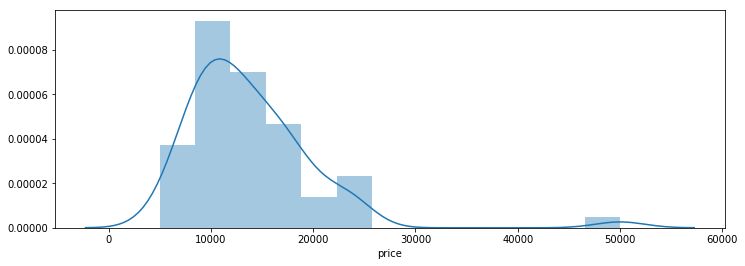

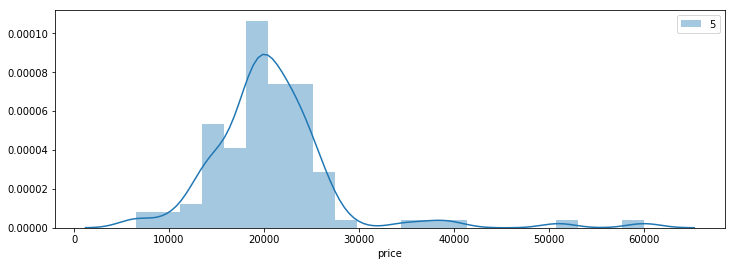

In [353]:

hist_data = brand_data[(brand_data["brand"] == brand) & (brand_data["sales_date"] >= date_of_30_days_before)]

conditions = hist_data["item_condition"].unique()

for condition in conditions:
    plt.figure(figsize=(12,4))
    
    sns.distplot(hist_data[hist_data["item_condition"] == condition]["price"], label=condition)
plt.legend()
plt.show()

In [109]:
# start_date = "2020-06-01"
start_date = (datetime.datetime.now() - datetime.timedelta(days=90)).strftime("%Y-%m-%d")
group_key = ["brand", "volume", "item_condition"]

ts = df[["sales_date", "brand", "volume", "item_condition", "price"]].set_index("sales_date")
ts = ts[ts.index >= start_date]
ts = ts.groupby(group_key).resample("1D").mean().fillna(method="ffill")["price"]

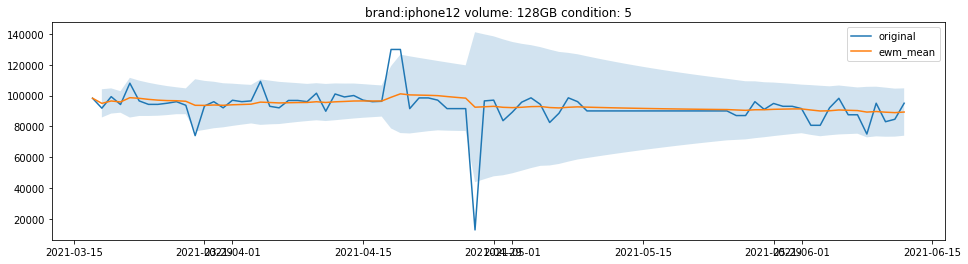

In [110]:
brand = "iphone12"
volume = "128GB"
condition = 5
span = 30
threshold = 2

fig, ax = plt.subplots(figsize=(16, 4))

plot_data = ts.loc[brand, volume, condition]
ewm_mean = plot_data.ewm(span=span).mean()
ewm_std  = plot_data.ewm(span=span).std()
ax.plot(plot_data, label="original")
ax.plot(ewm_mean, label="ewm_mean")

ax.fill_between(plot_data.index,
                ewm_mean + ewm_std * threshold,
                ewm_mean - ewm_std * threshold,
                alpha=0.2
               )

ax.set_title(f"brand:{brand} volume: {volume} condition: {condition}")
plt.legend()
plt.show()

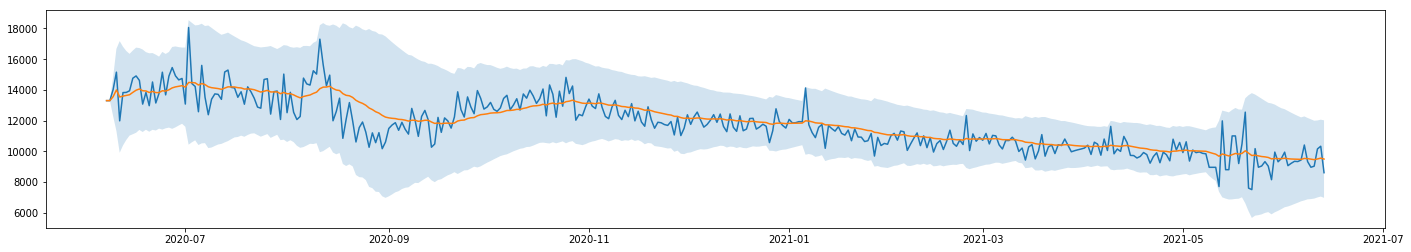

In [7]:

fig, ax = plt.subplots(figsize=(24, 4))
threshold = 3

ewm_mean = ts.ewm(span=span).mean()
ewm_std  = ts.ewm(span=span).std()

ax.plot(ts, label="original")
ax.plot(ewm_mean, label='ewma')

ax.fill_between(ts.index,
                (ewm_mean - ewm_std * threshold).values.reshape(-1),
                (ewm_mean + ewm_std * threshold).values.reshape(-1),
                alpha=0.2)
plt.show()


364


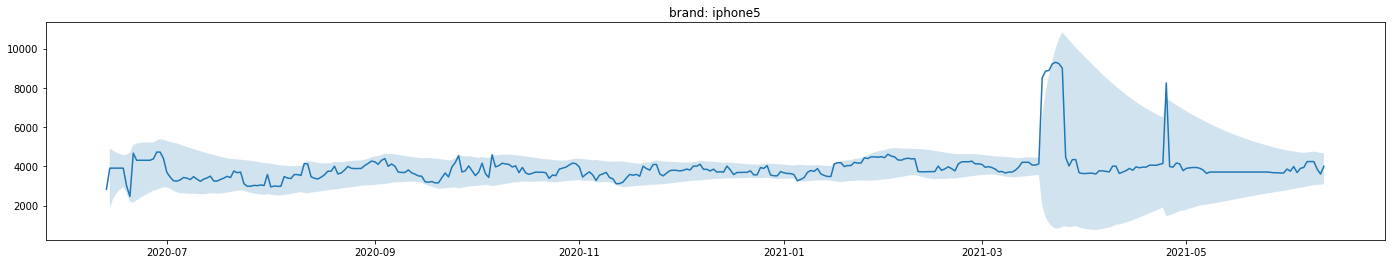

345


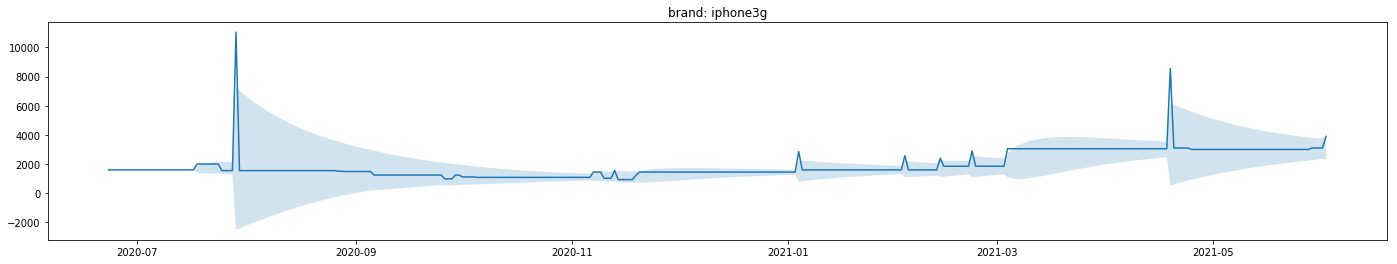

364


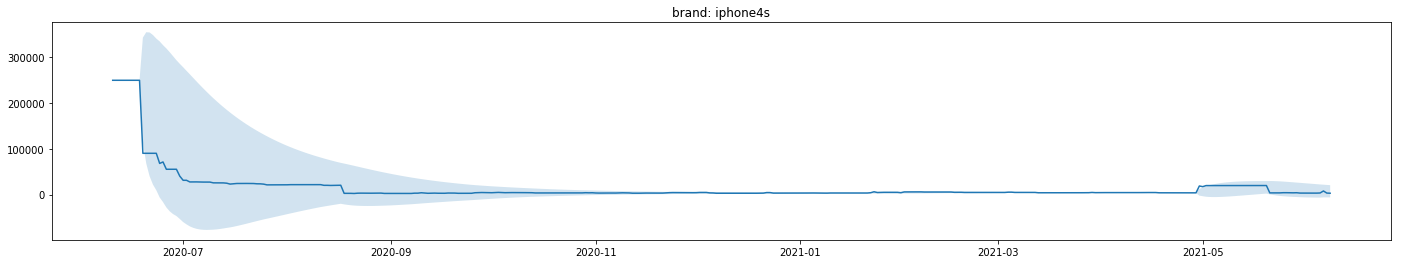

368


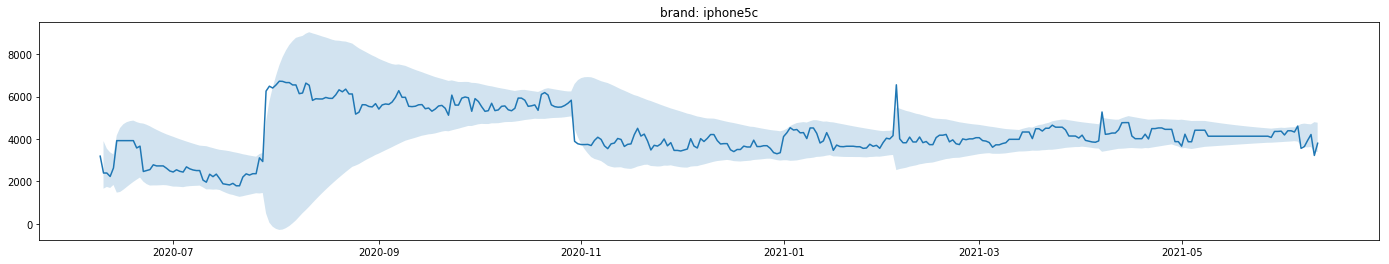

310


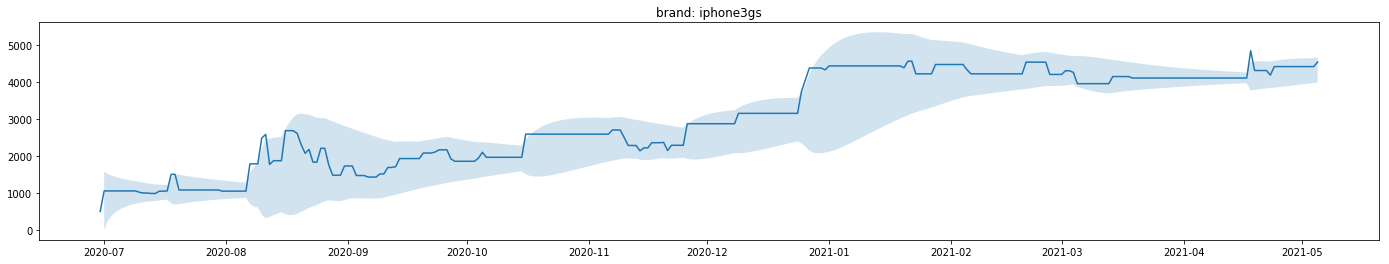

338


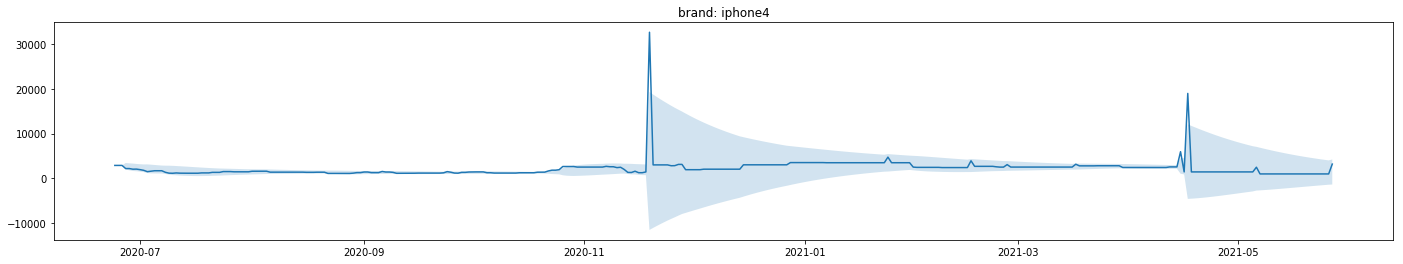

370


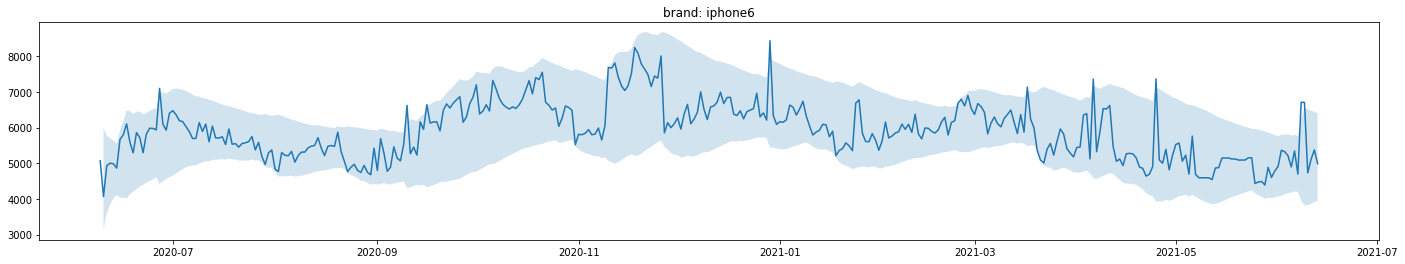

372


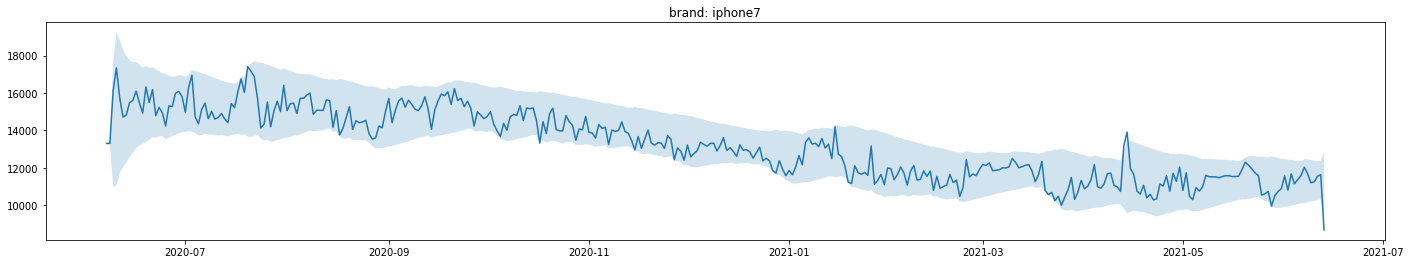

370


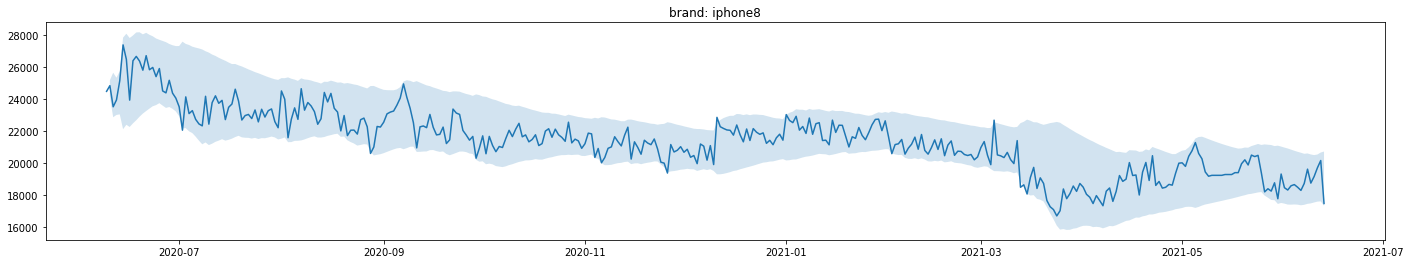

370


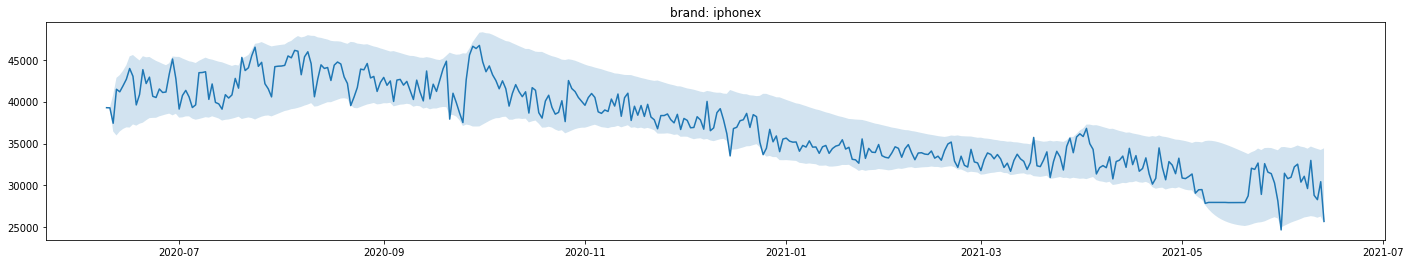

371


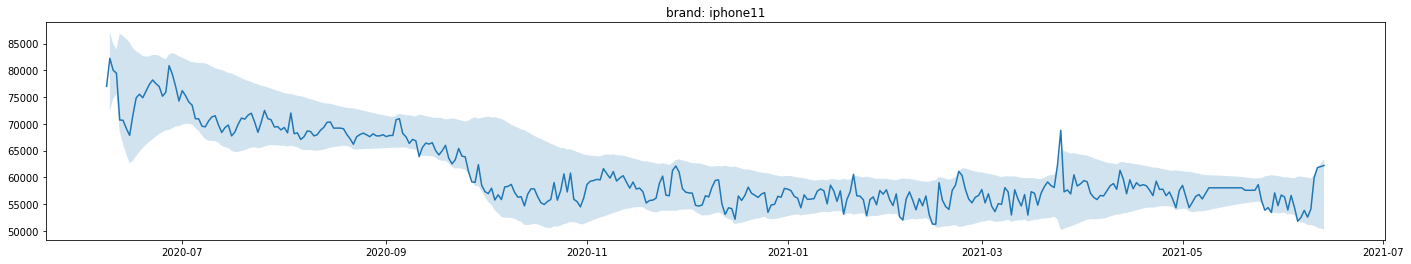

254


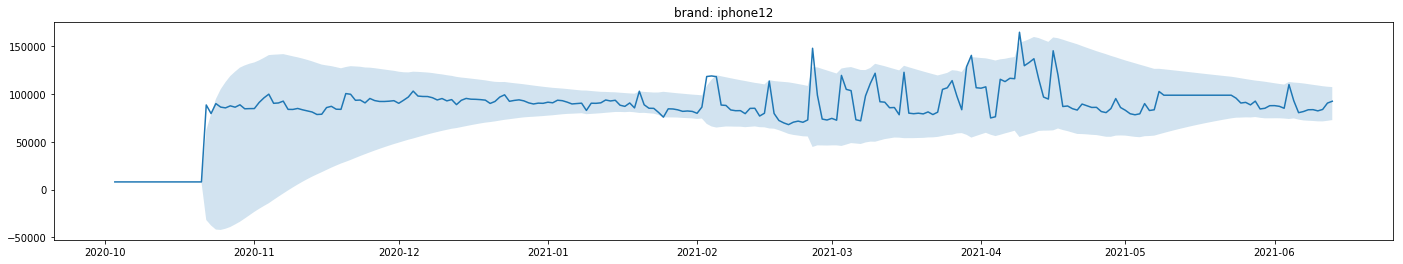

370


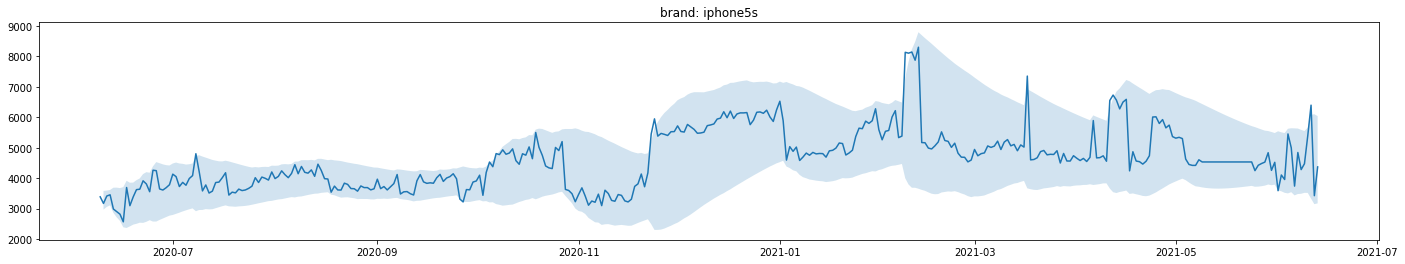

370


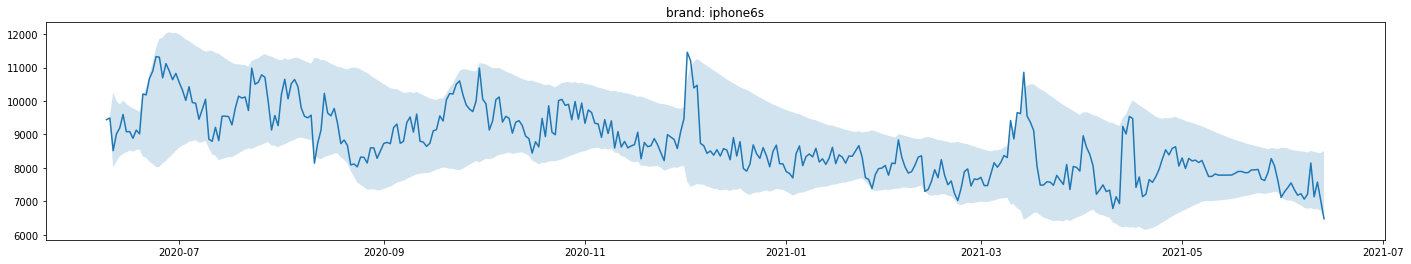

370


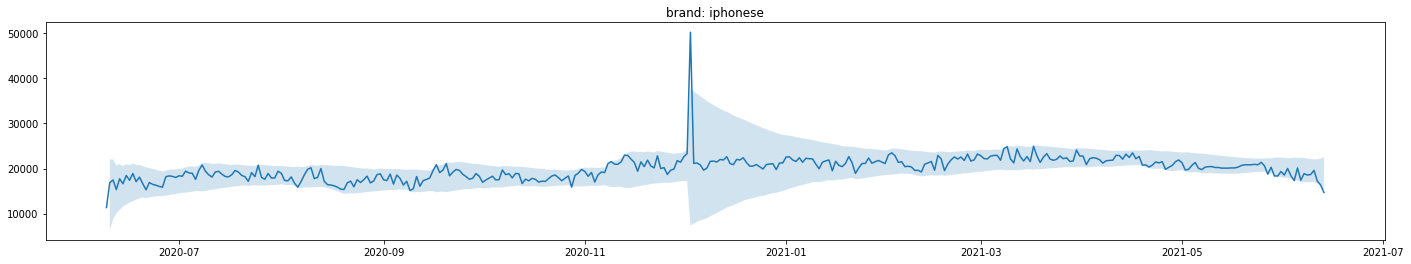

370


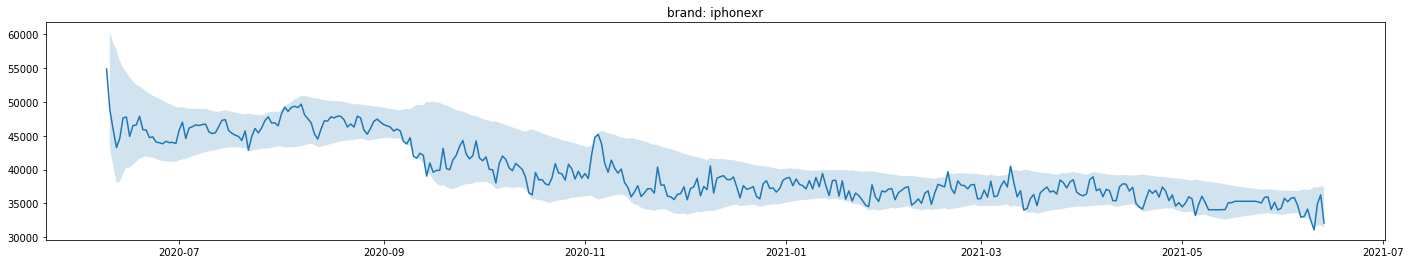

370


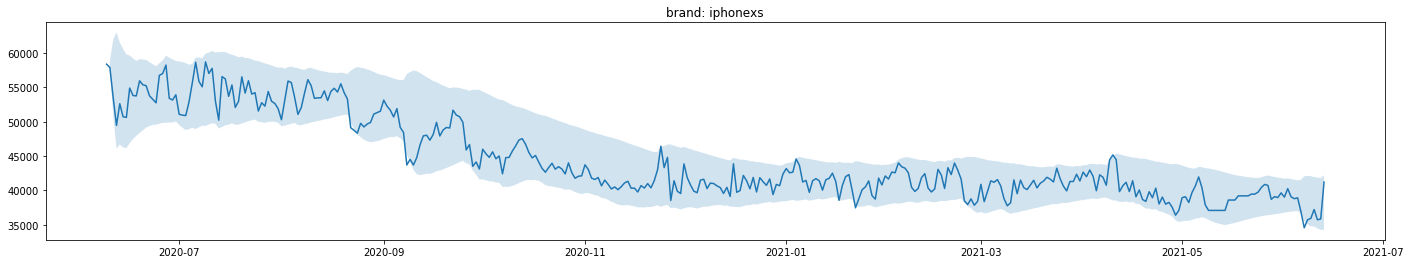

370


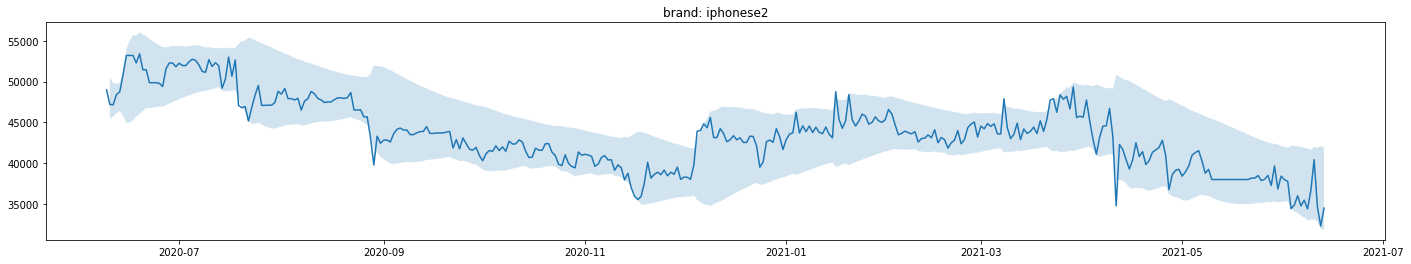

370


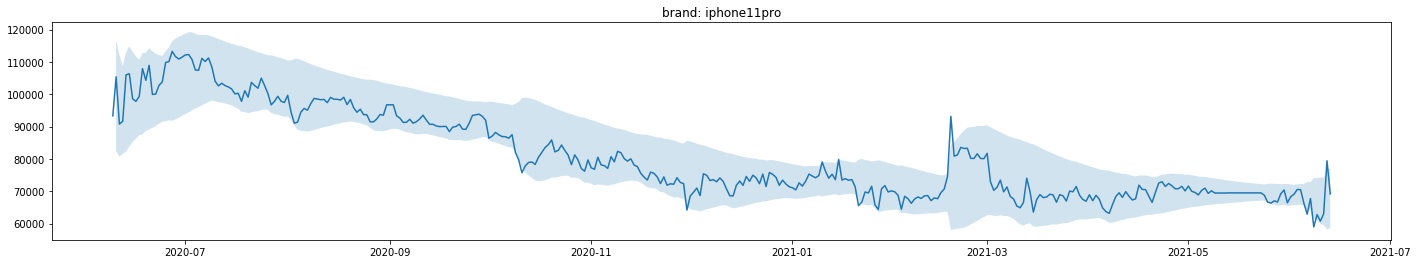

237


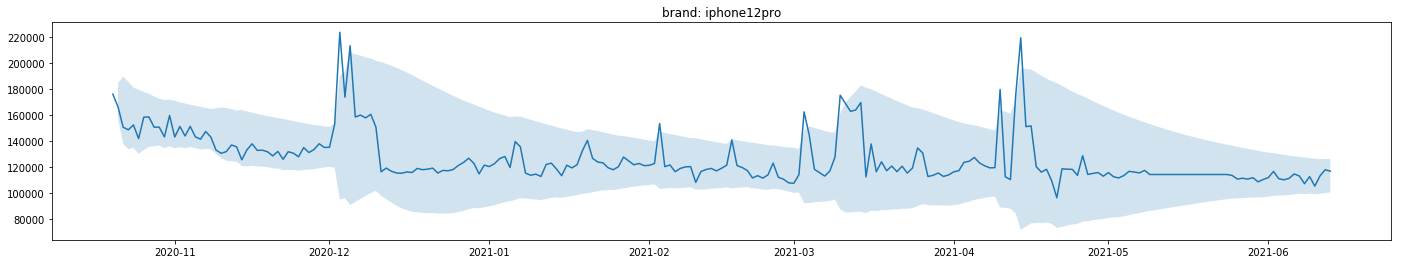

369


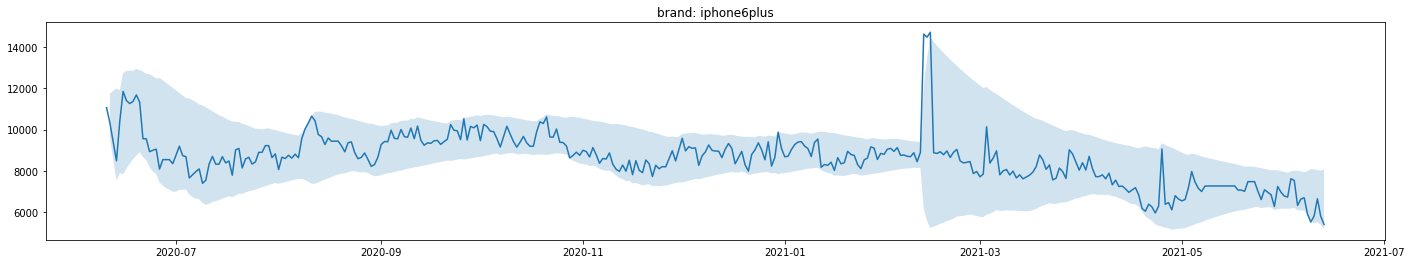

370


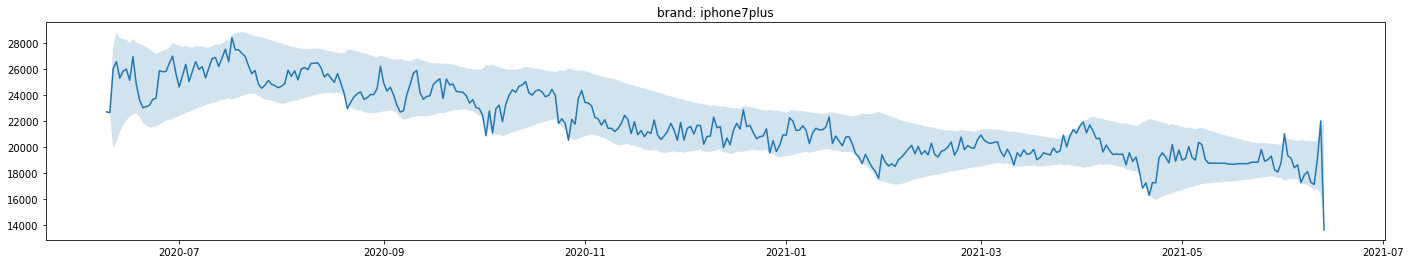

370


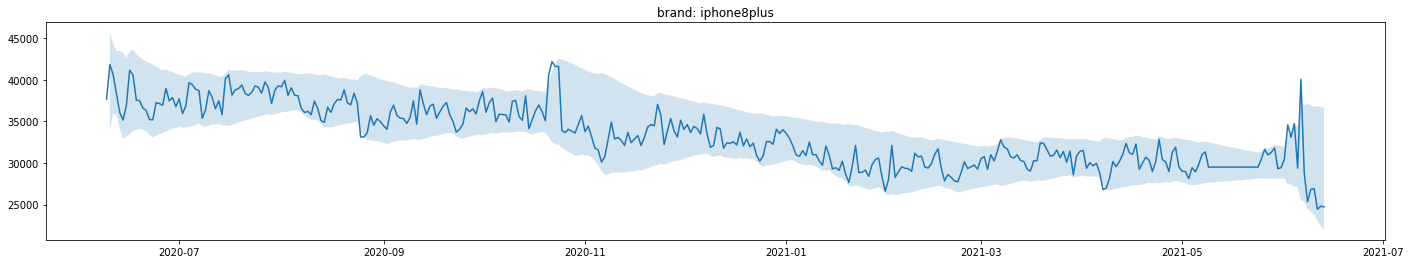

370


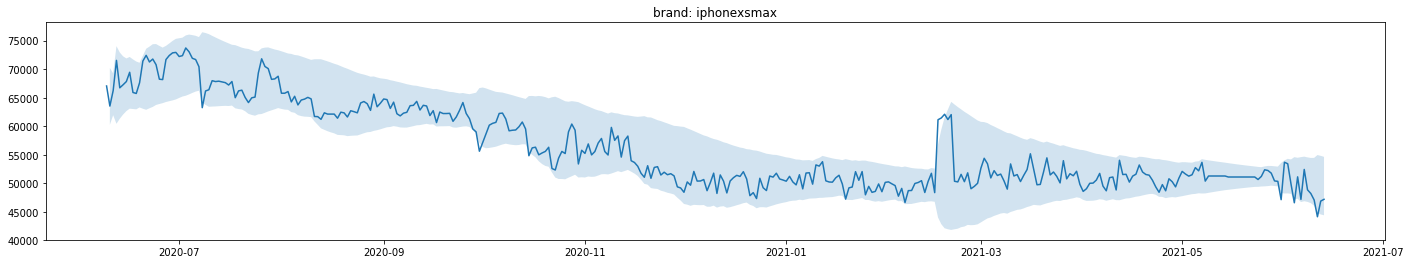

214


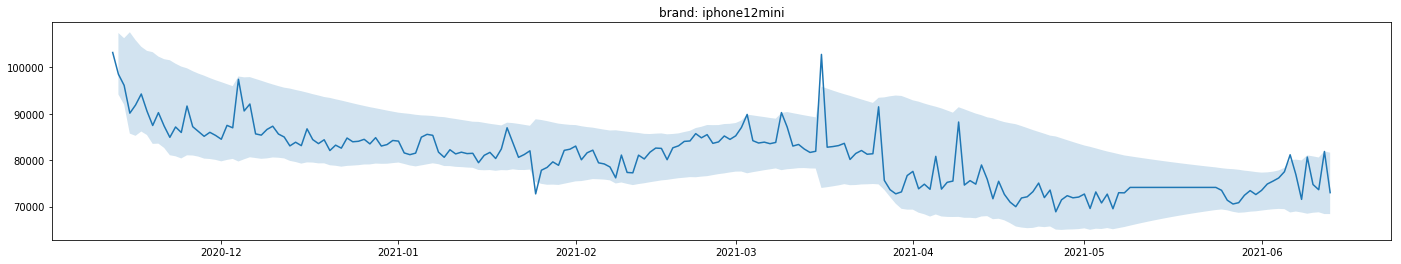

370


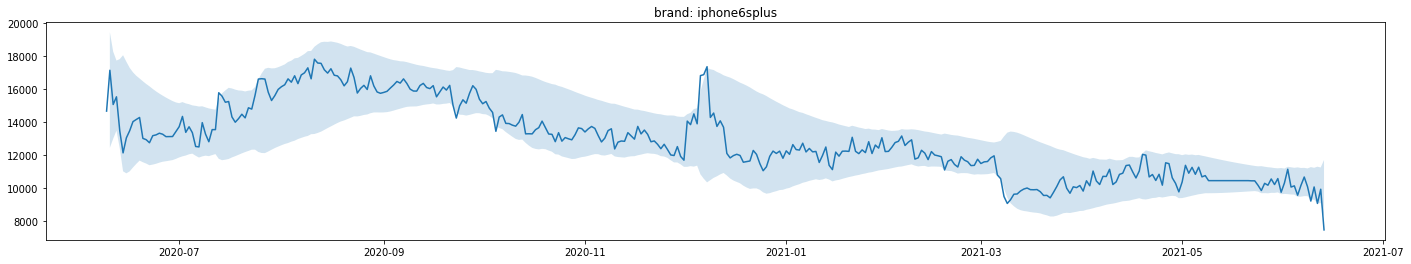

370


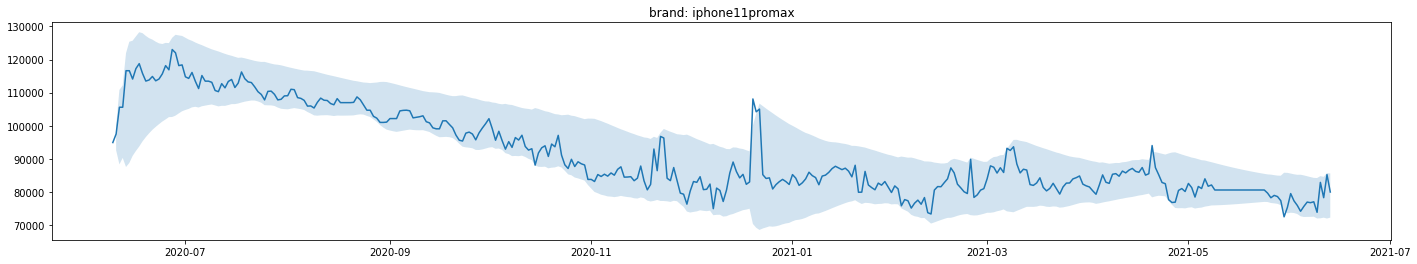

214


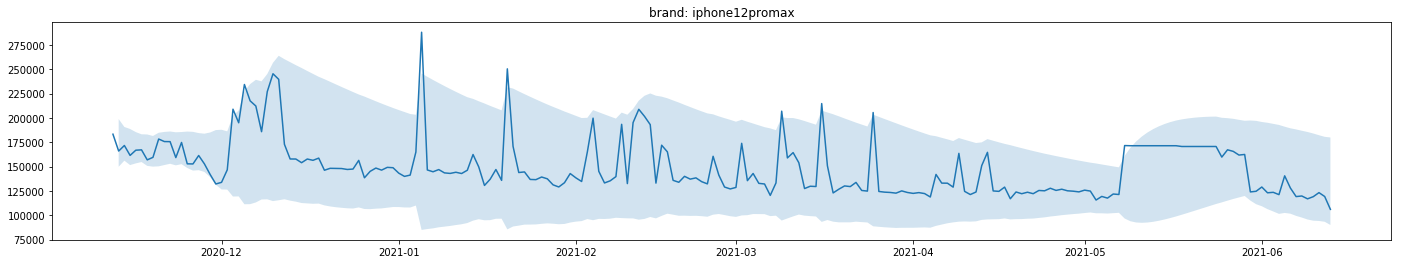

In [91]:
brands = df["brand"].unique()
span = 30
ts2 = ts.groupby(["brand", "sales_date"]).mean()

for brand in brands:
    plt.figure(figsize=(24,4))
    plot_data = ts2.loc[brand]
    ewm_mean = plot_data.ewm(span=span).mean()
    ewm_std  = plot_data.ewm(span=span).std()
    
    plt.fill_between(plot_data.index,
                     ewm_mean + ewm_std * threshold,
                     ewm_mean - ewm_std * threshold,
                     alpha=0.2)
    
    plt.title(f"brand: {brand}")
    plt.plot(plot_data)
    plt.show()

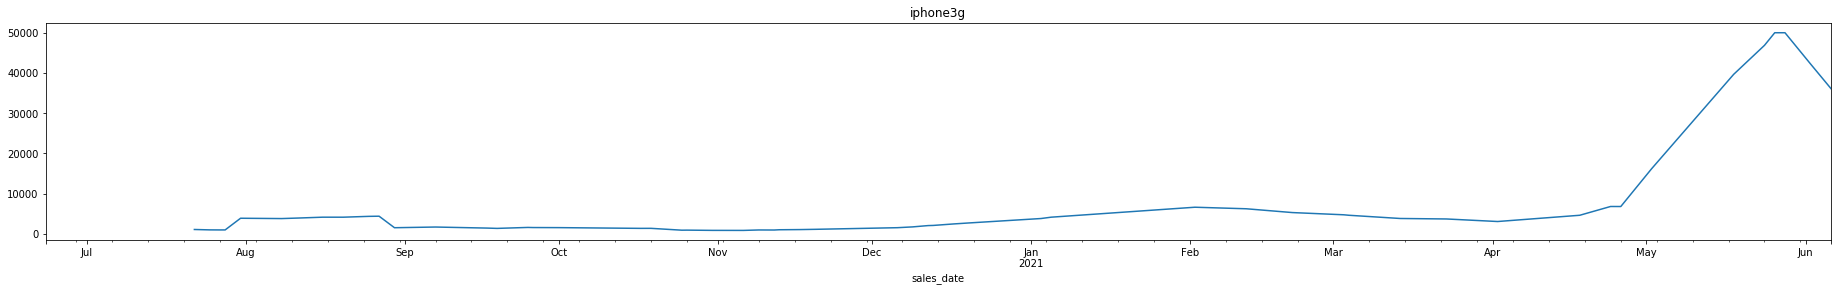

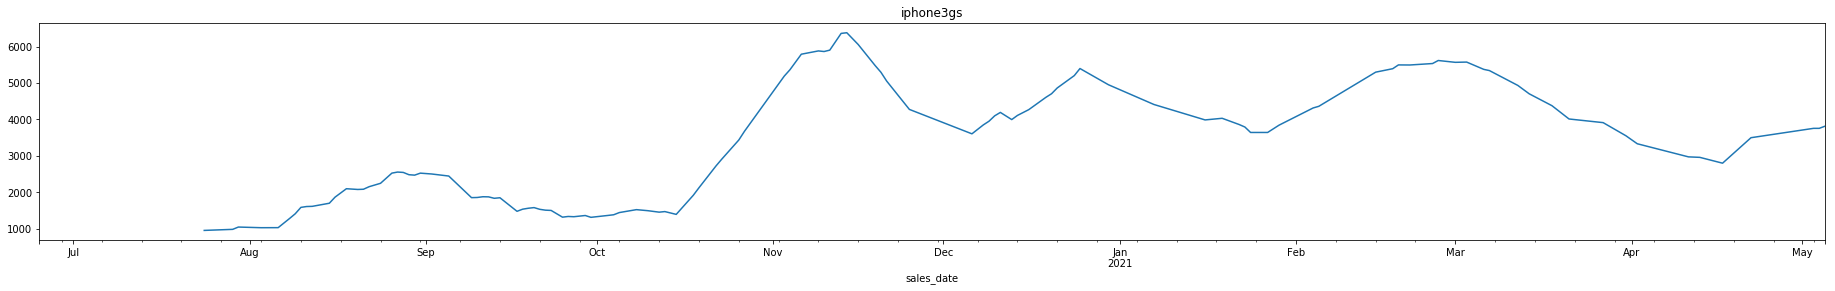

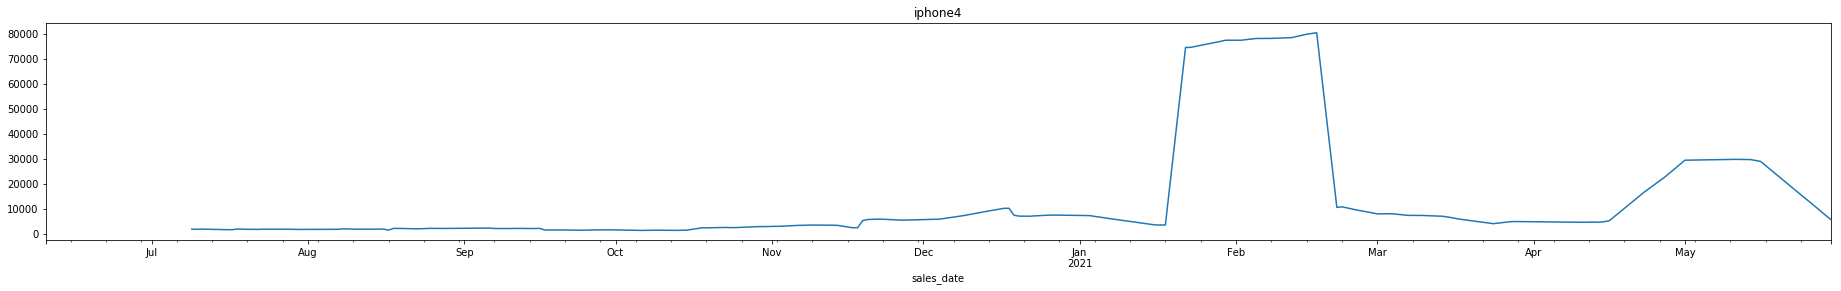

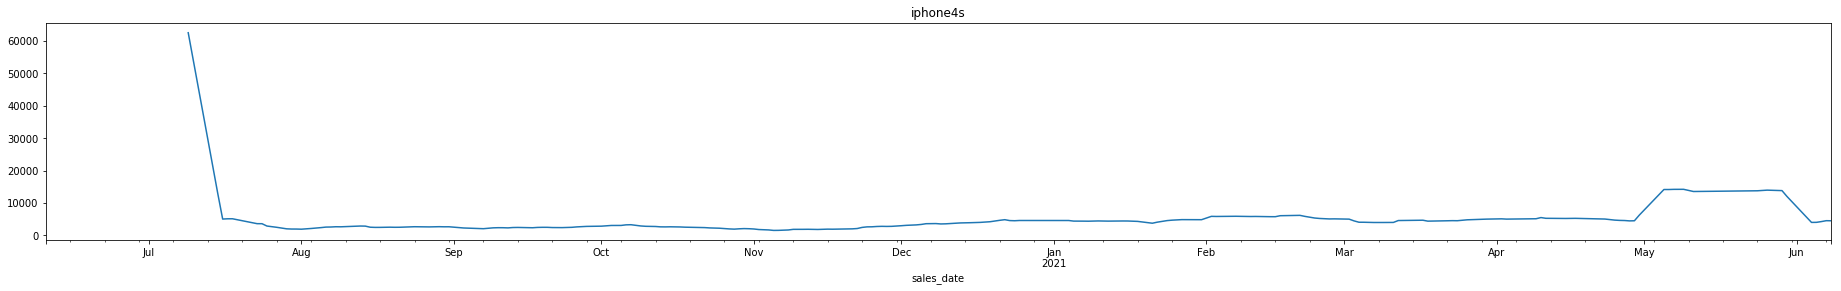

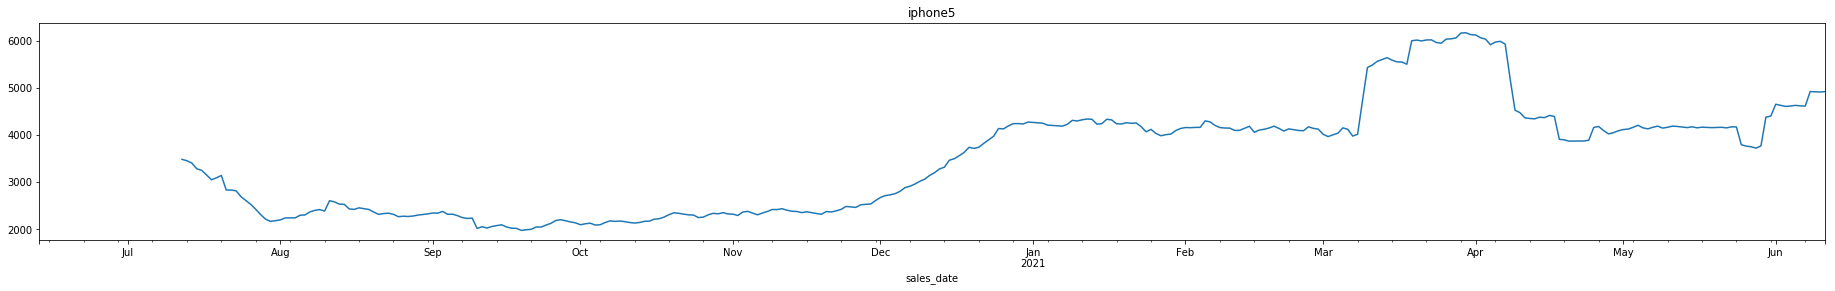

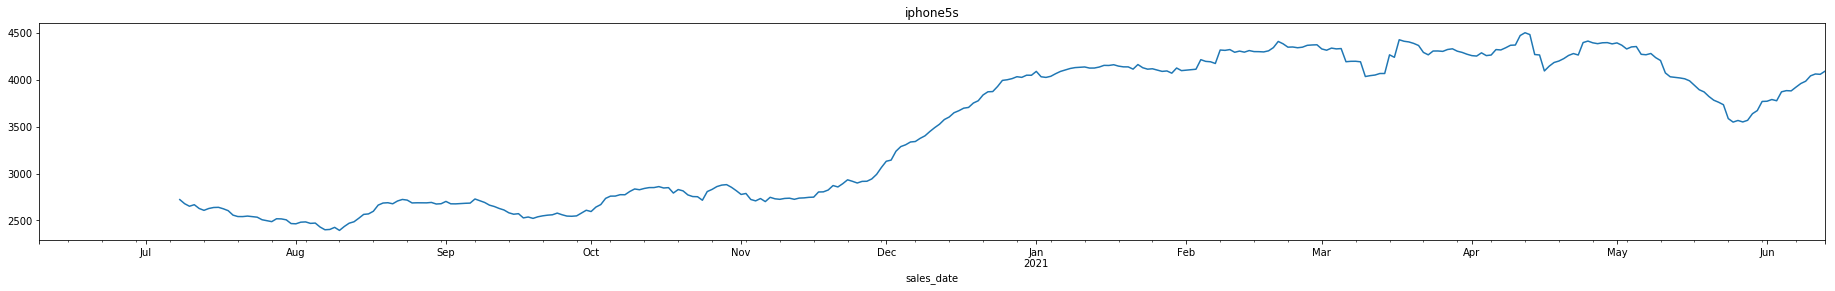

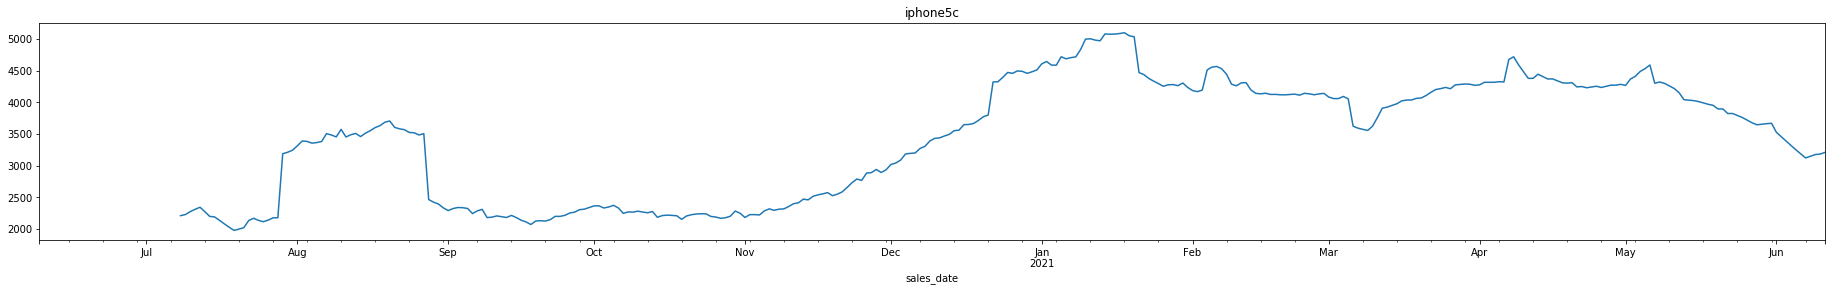

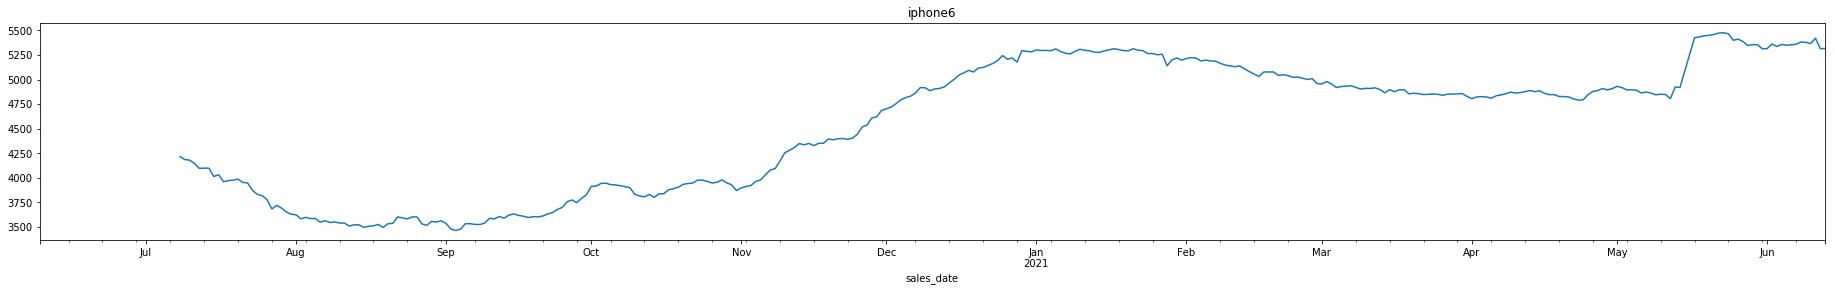

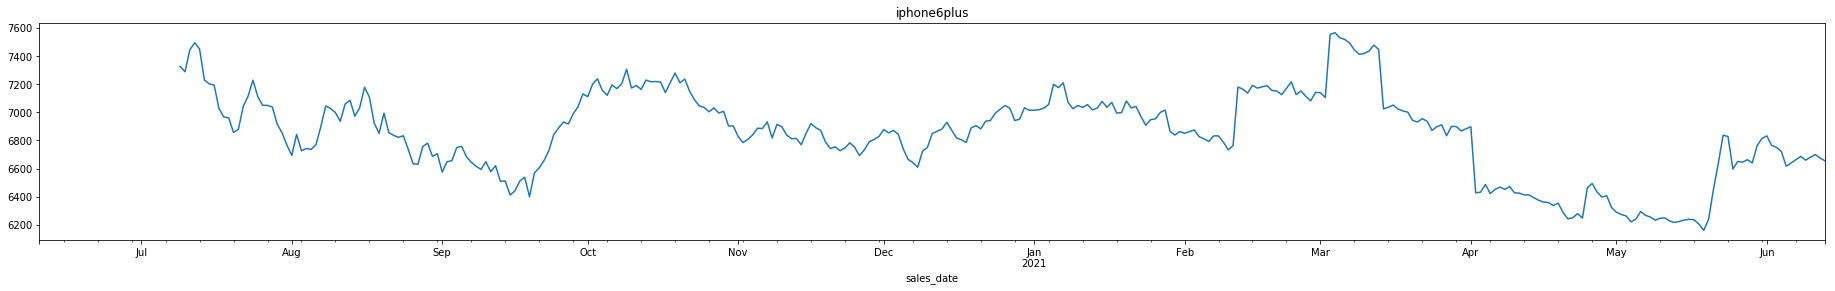

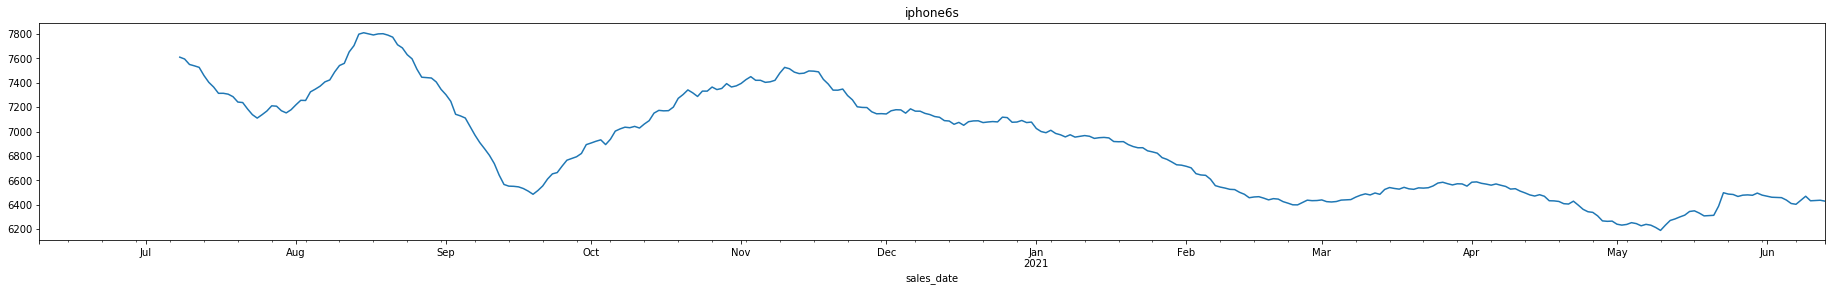

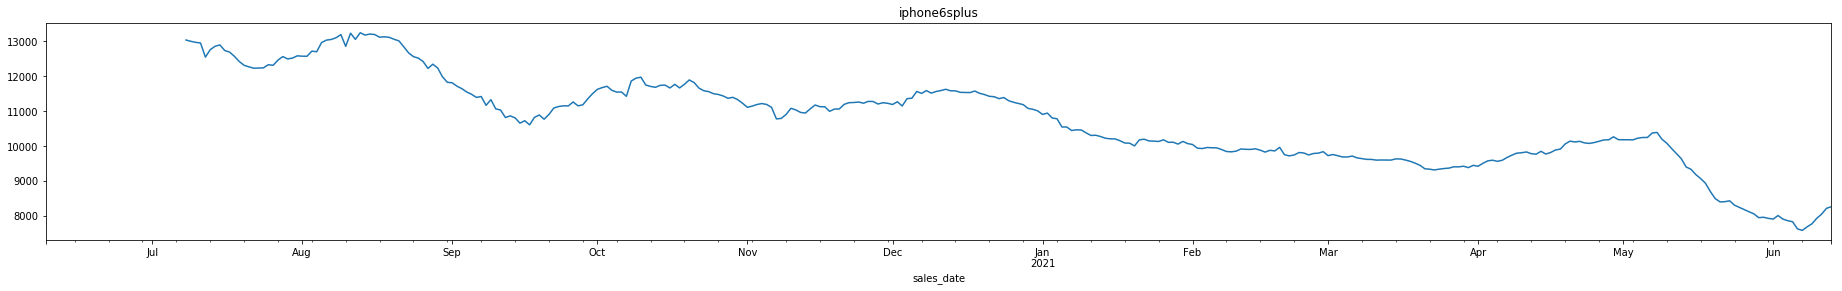

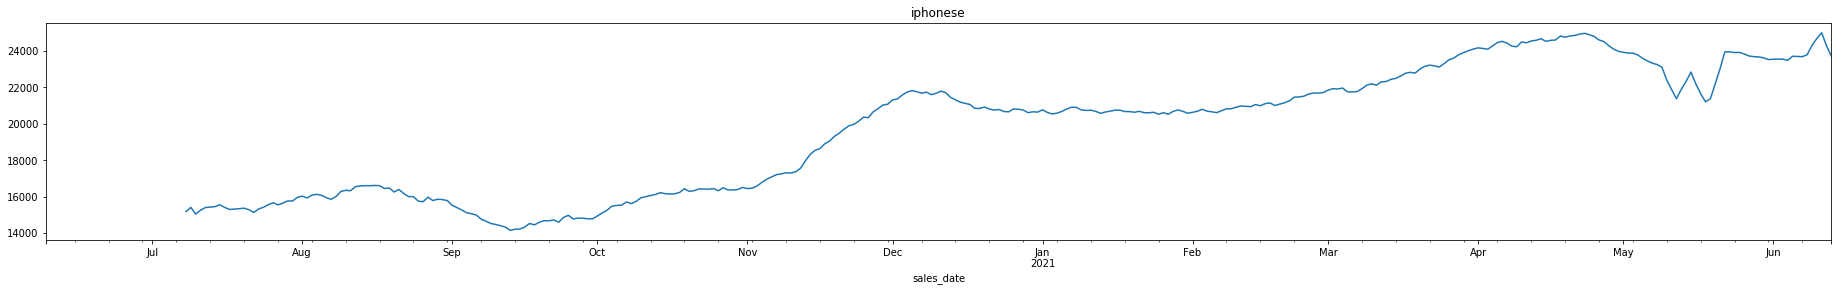

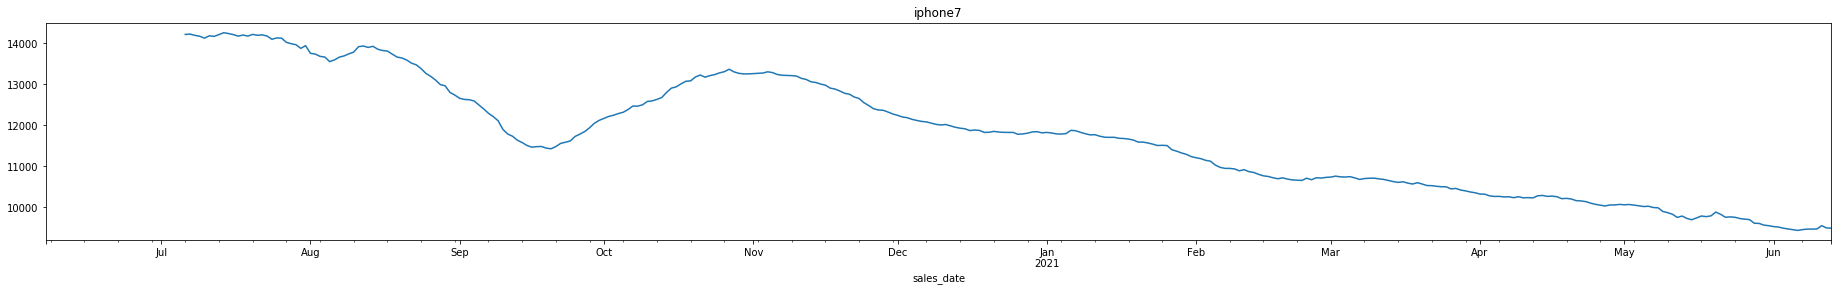

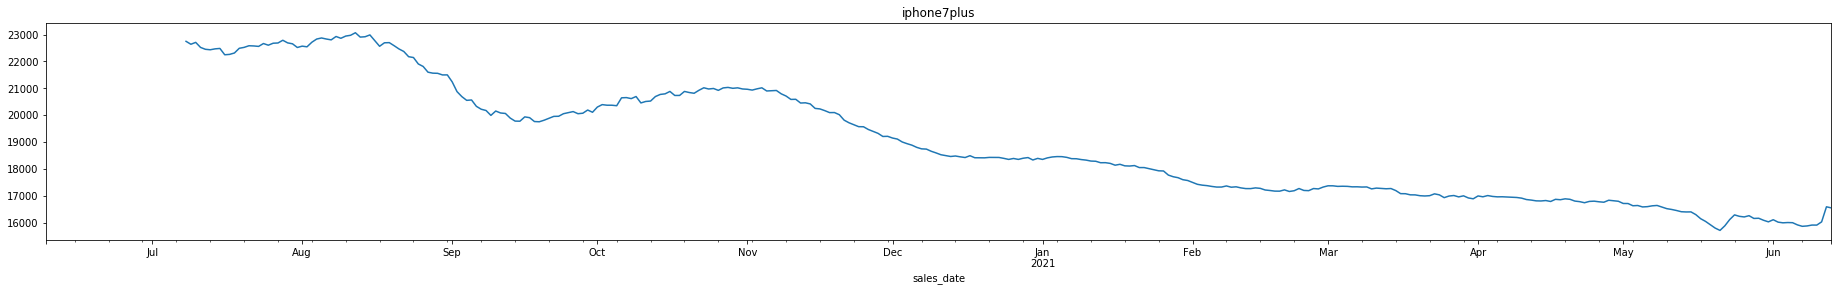

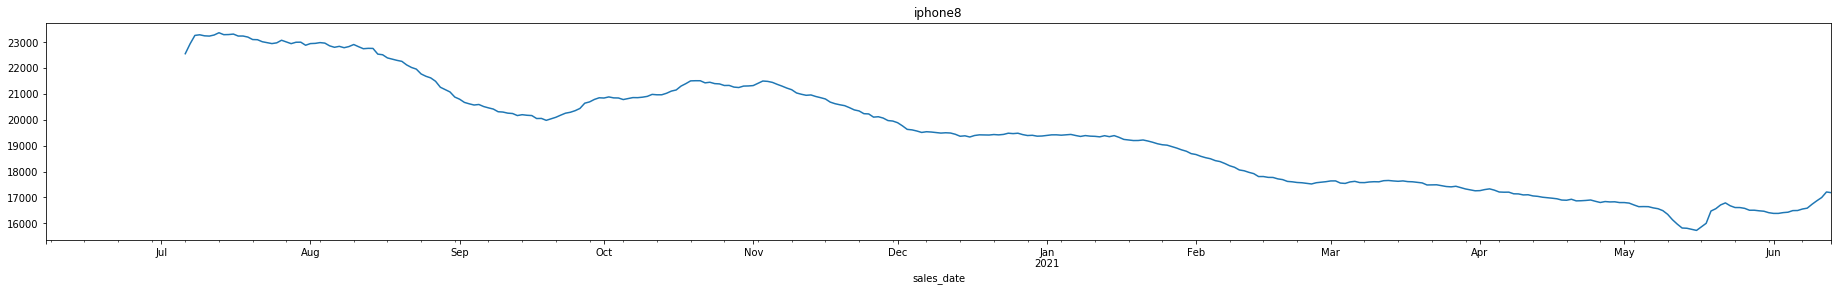

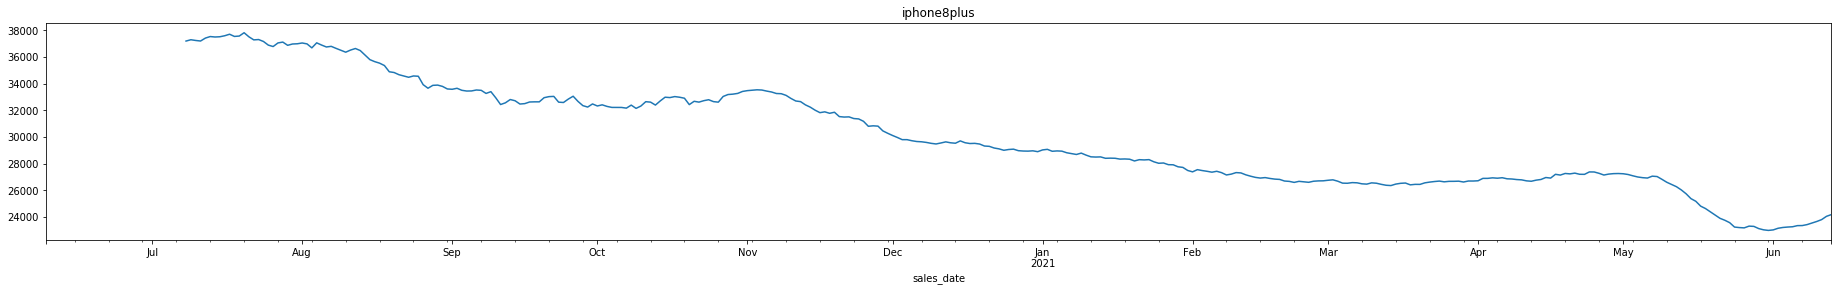

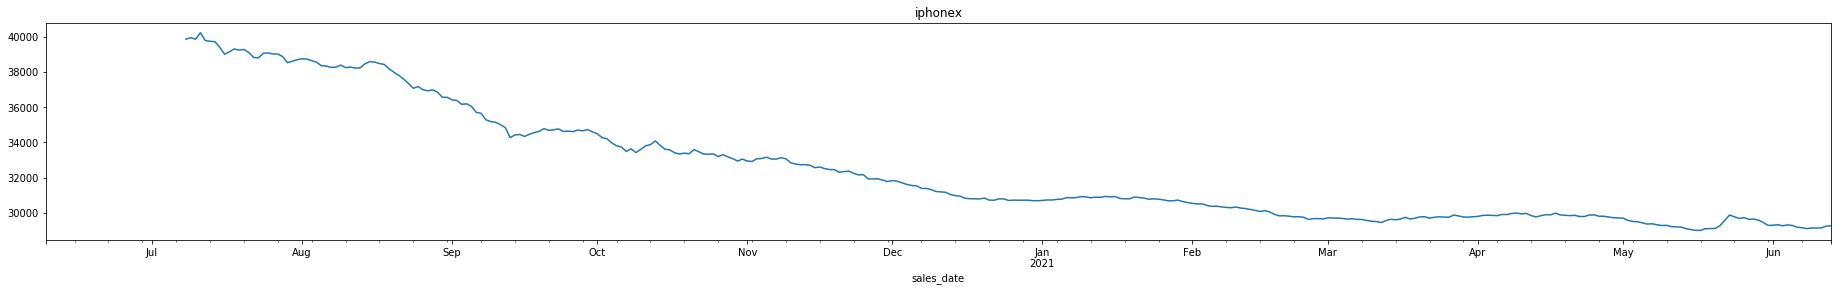

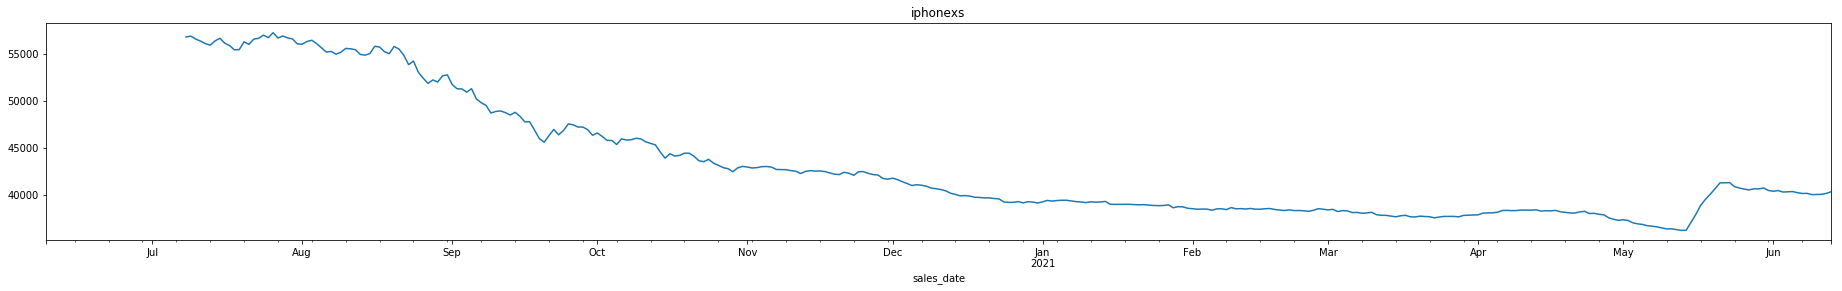

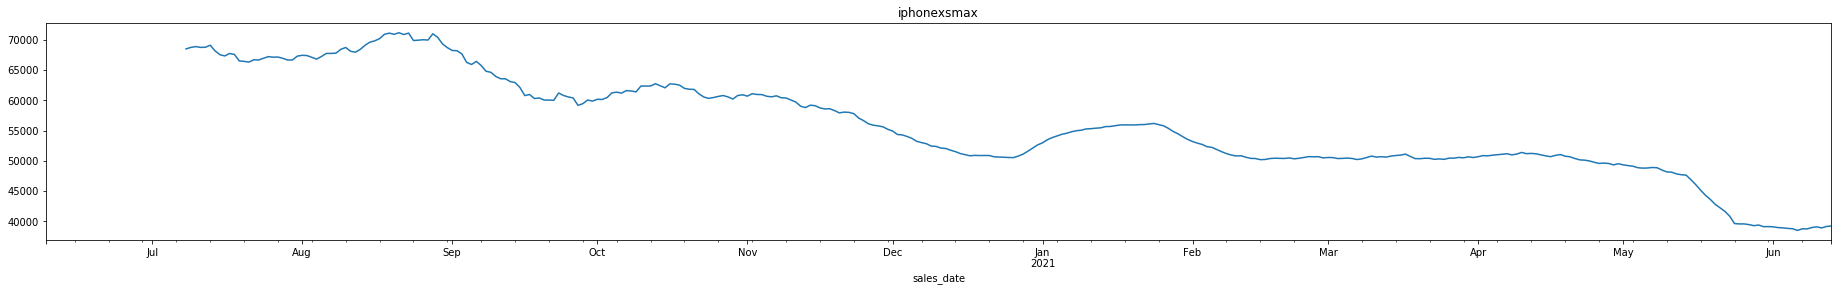

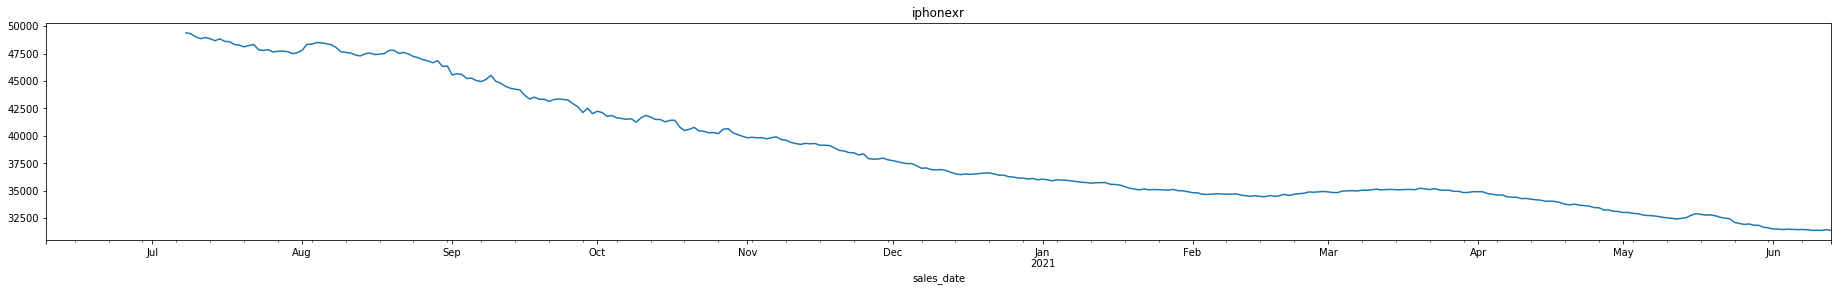

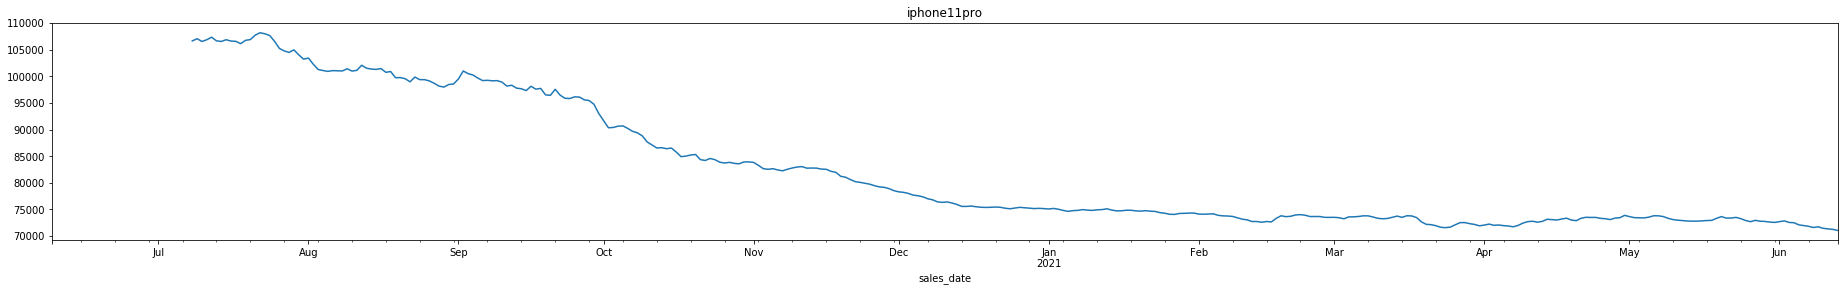

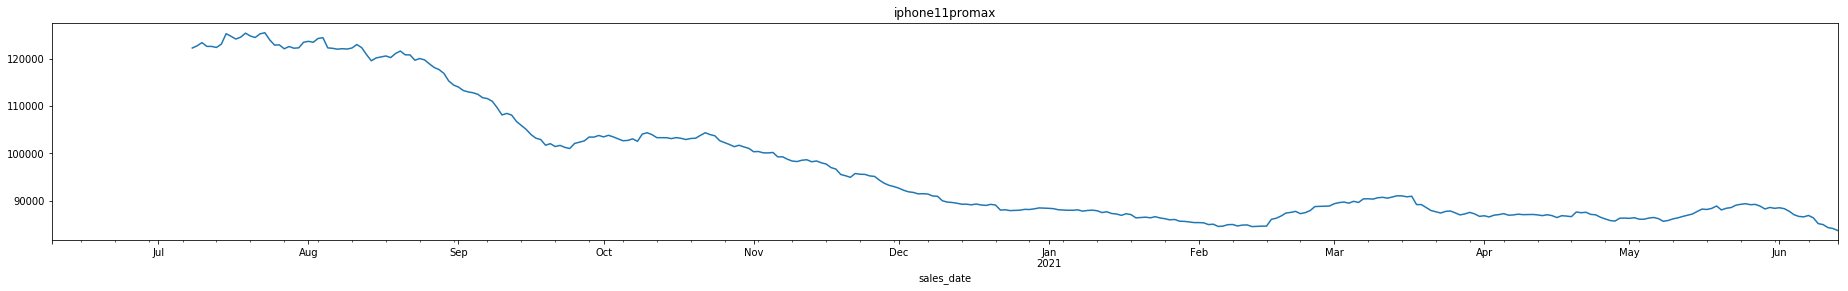

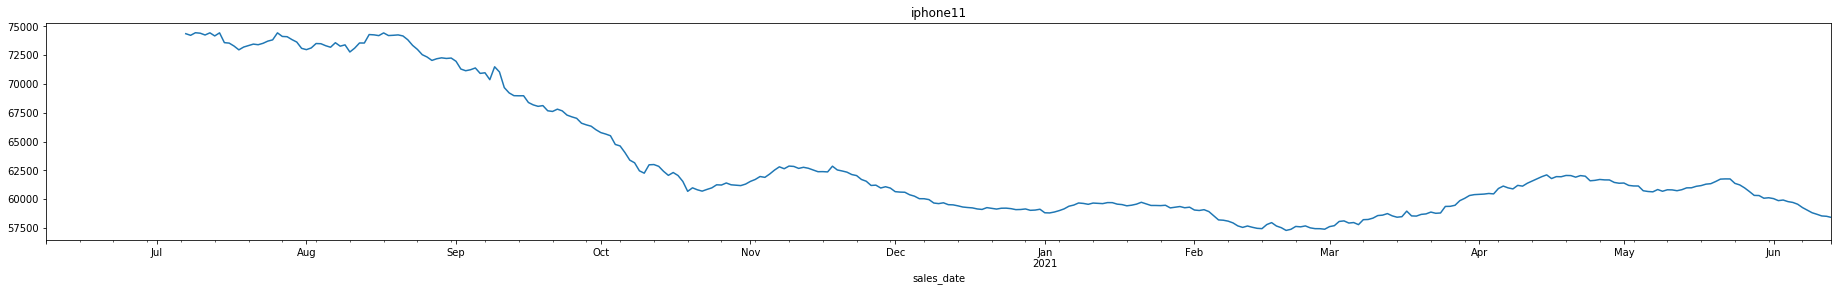

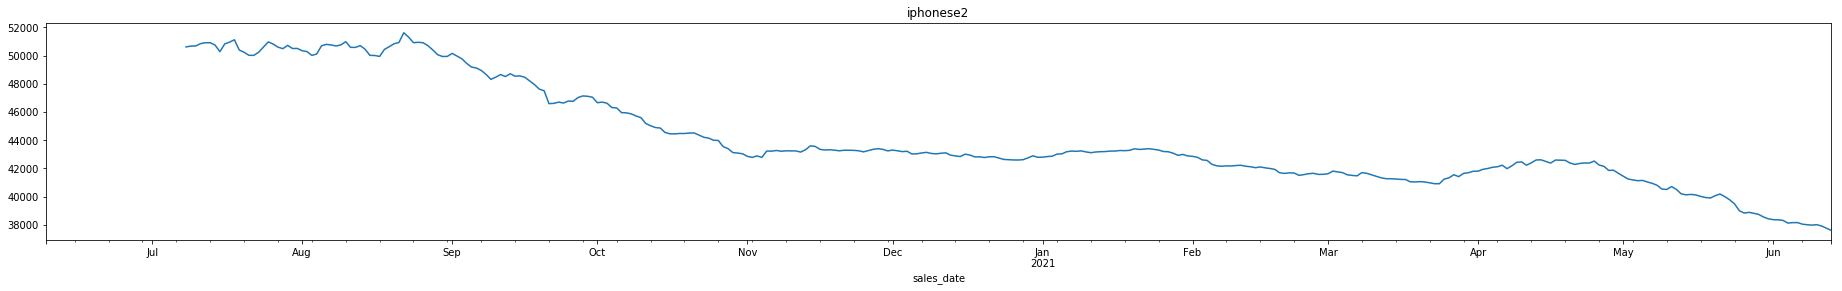

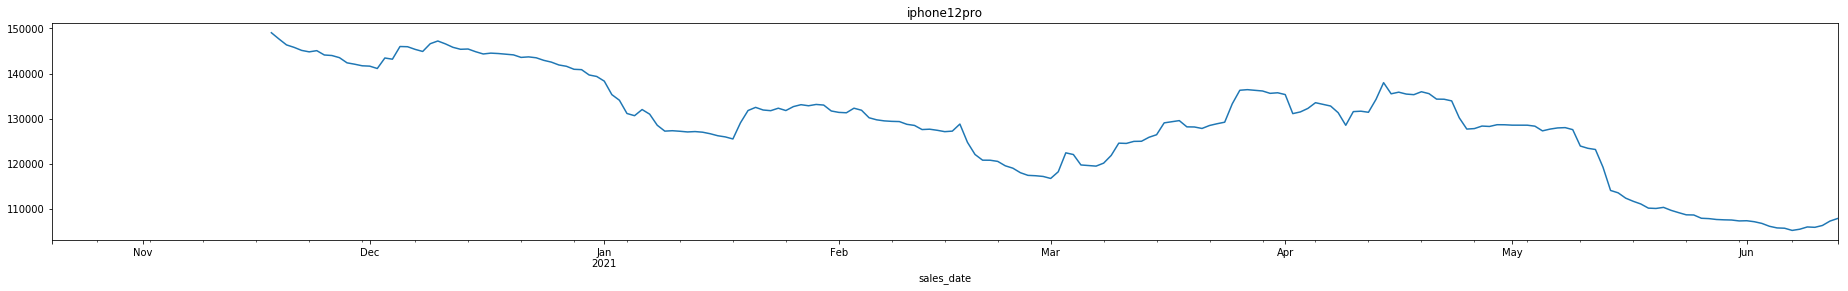

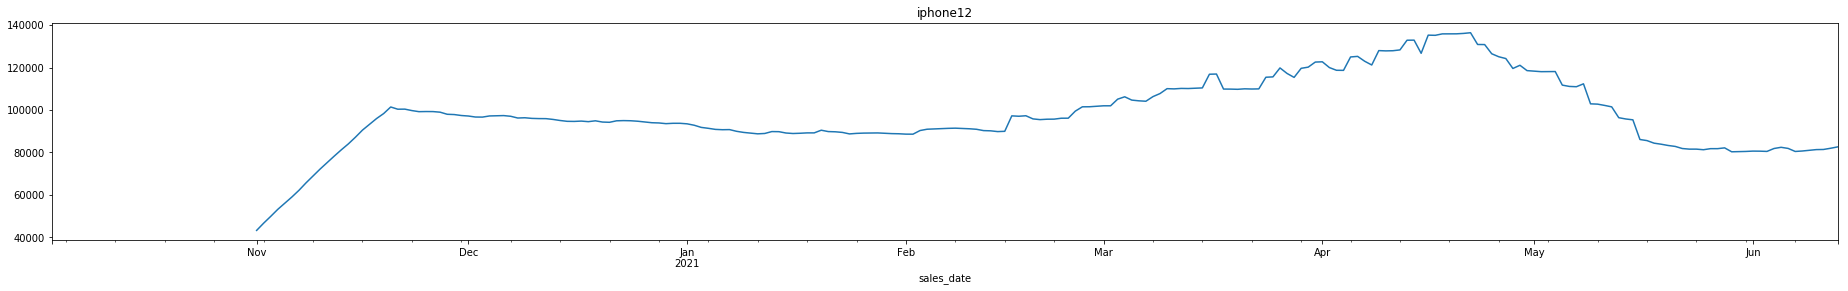

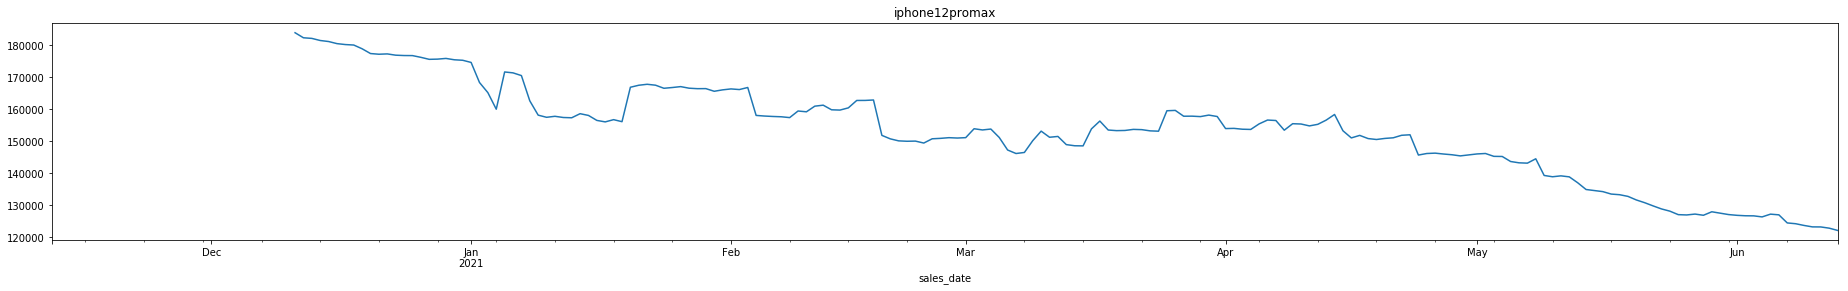

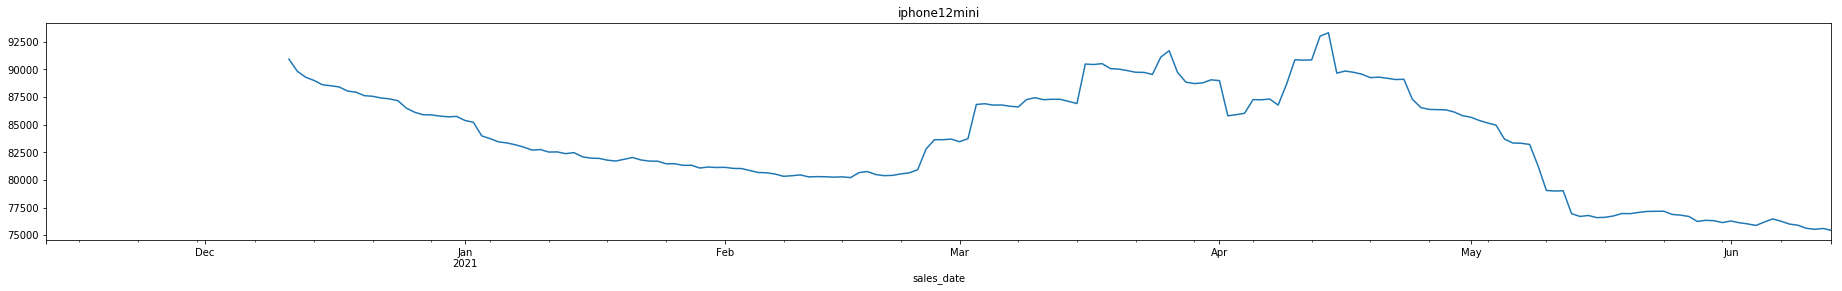

In [227]:
start_date = "2020-06-01"

for brand in brands:
    ts = df[df["brand"] == brand].set_index("sales_date")["price"]
    ts = ts[ts.index >= start_date].sort_index()
    ts = ts.resample("1D").mean().fillna(method="ffill")

    plt.figure(figsize=(32,4))
    plt.title(brand)
    ts.rolling(30).mean().plot()

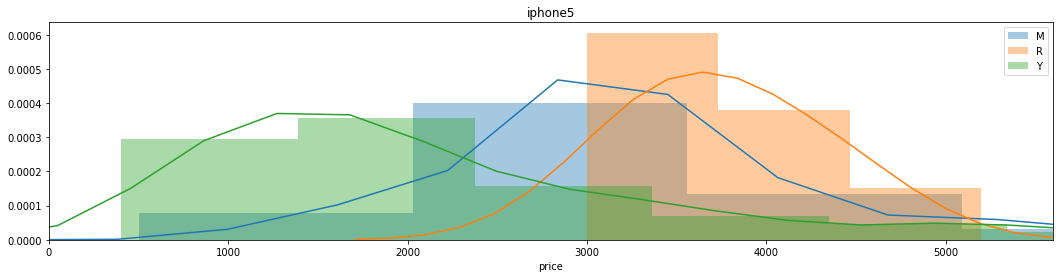

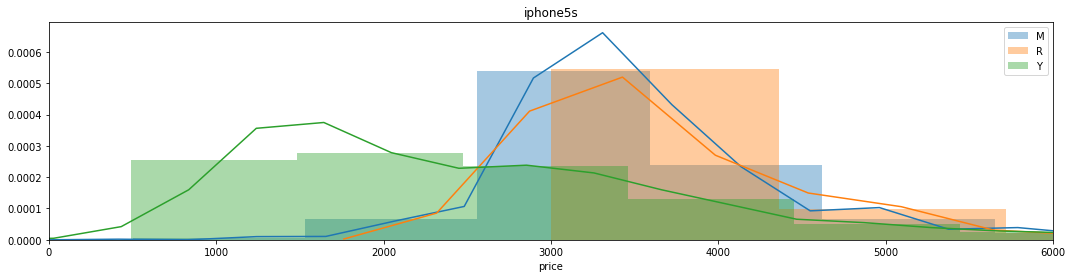

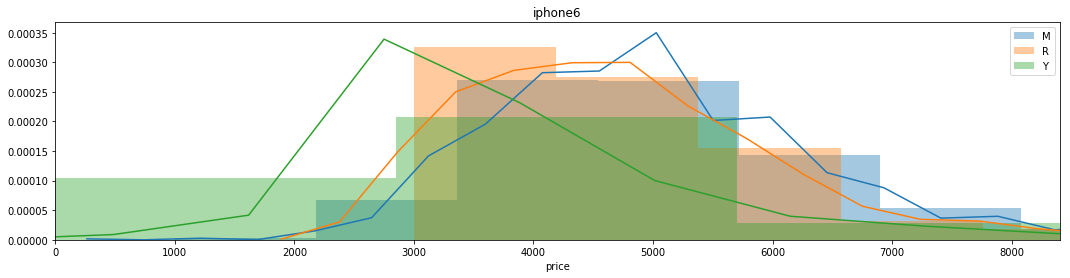

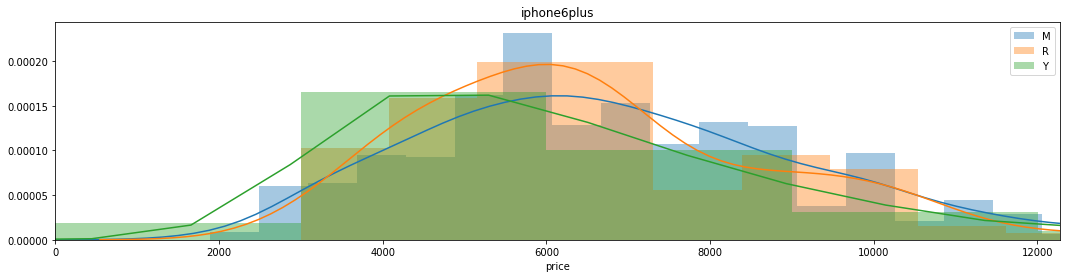

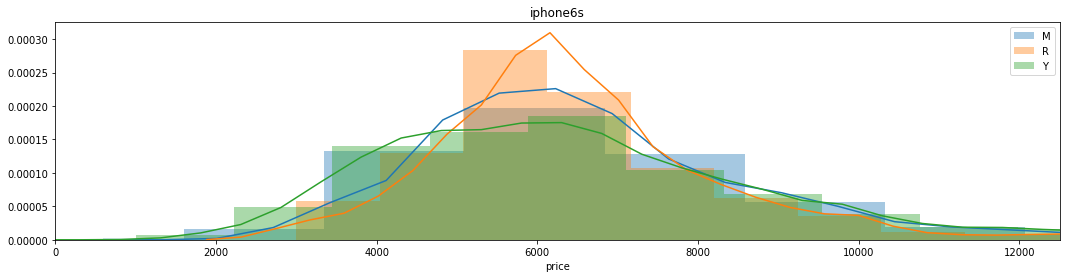

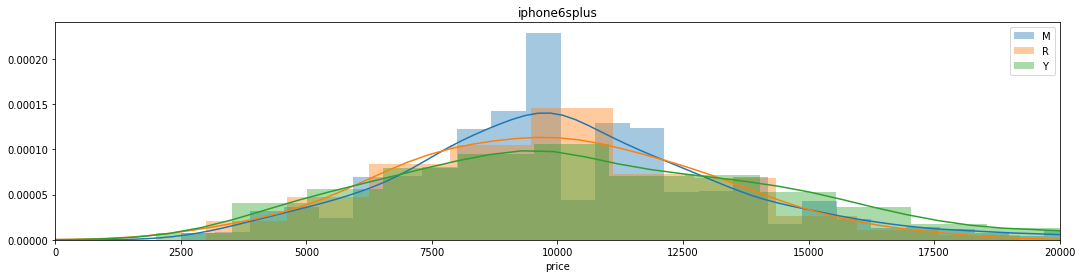

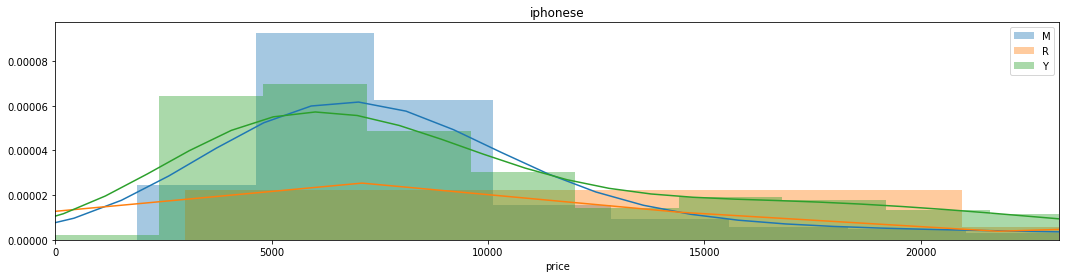

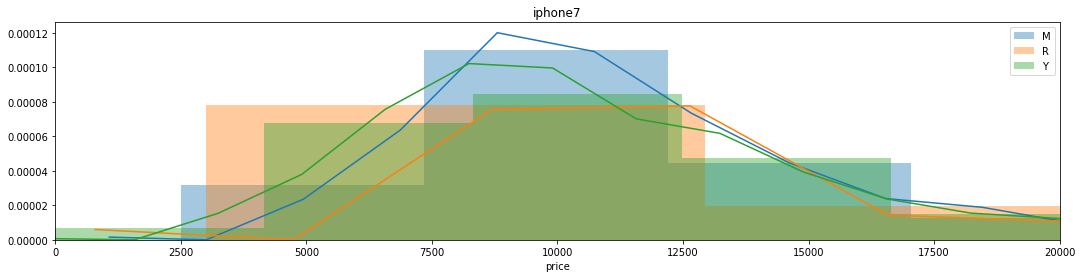

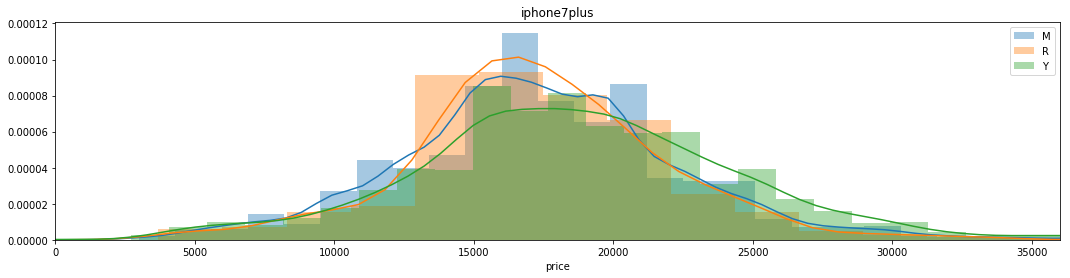

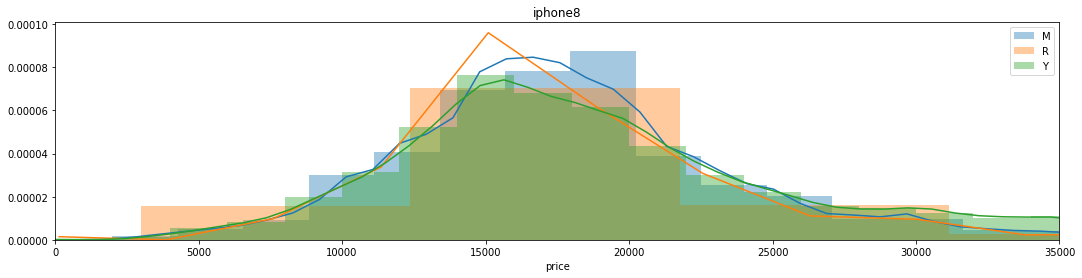

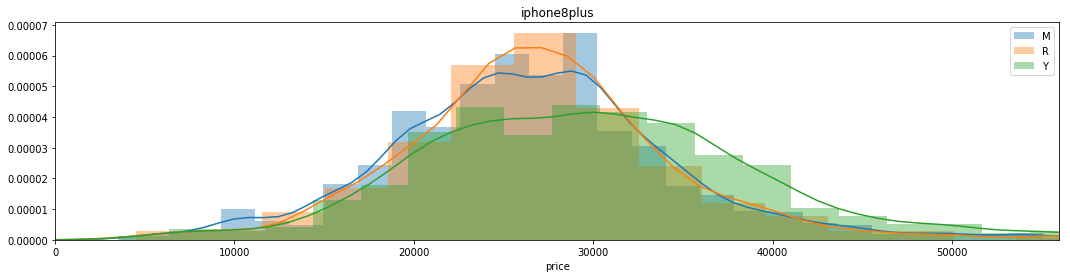

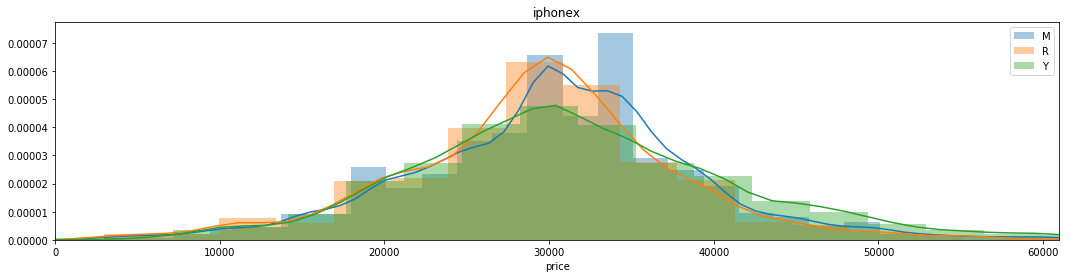

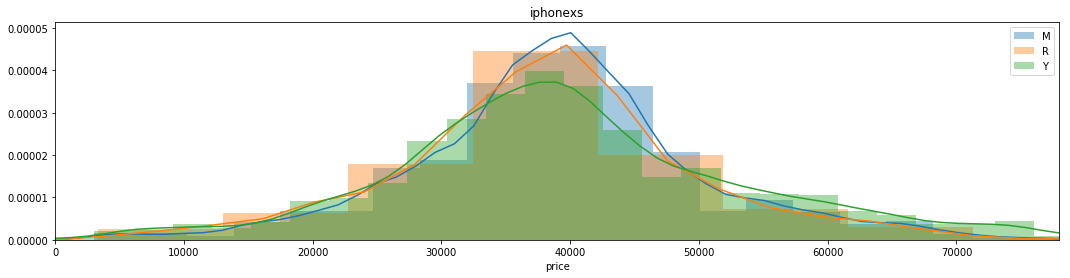

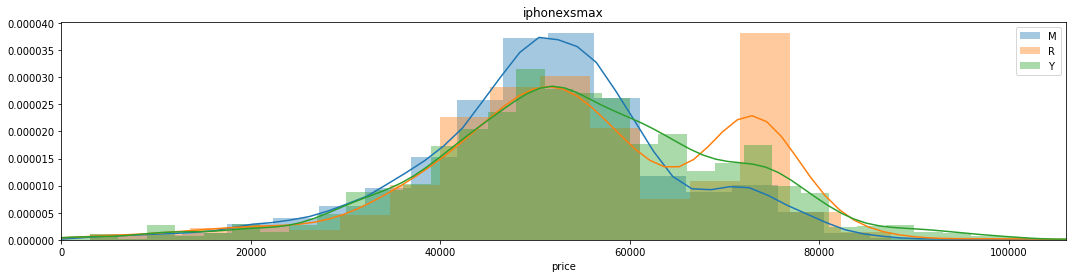

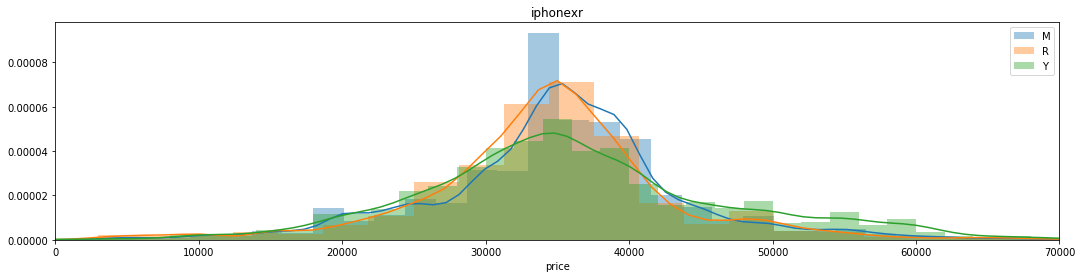

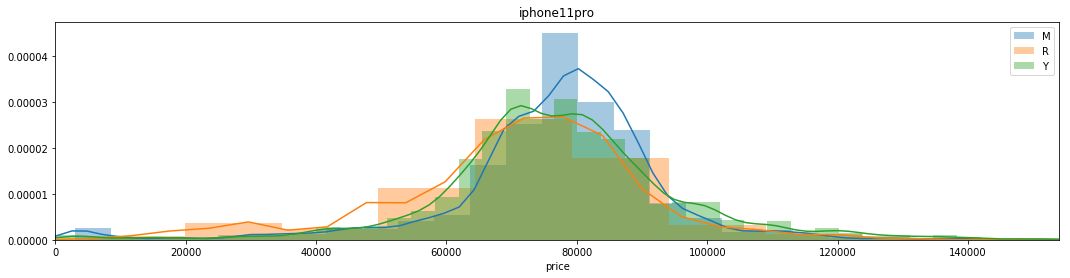

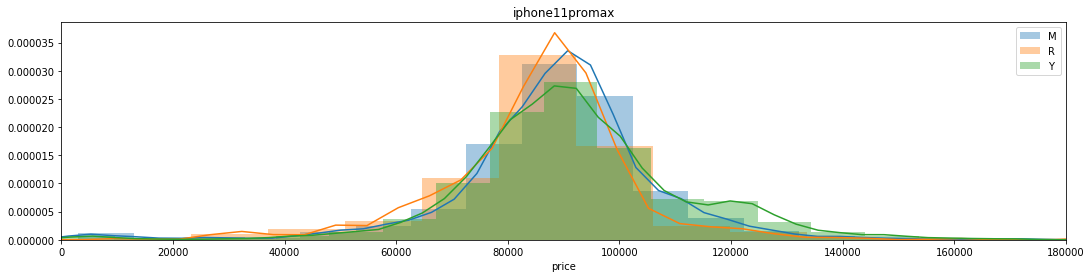

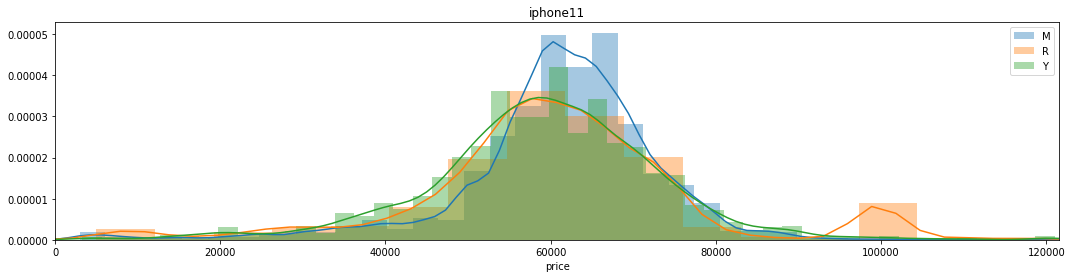

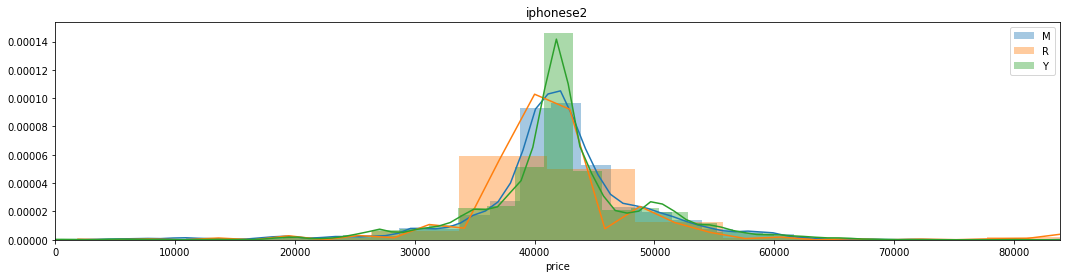

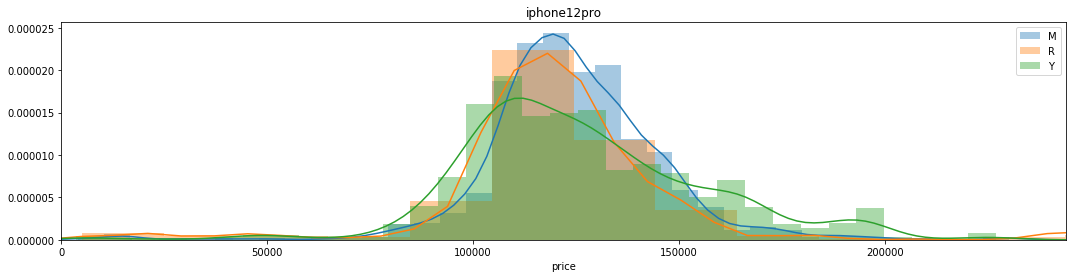

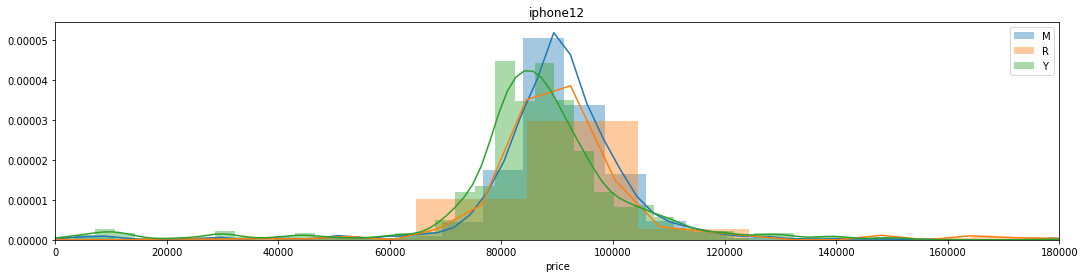

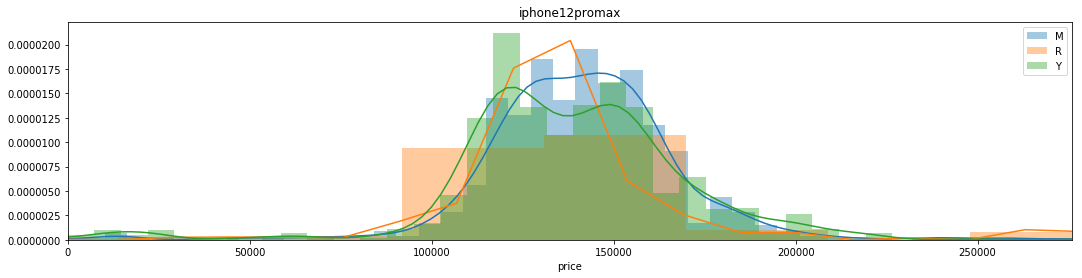

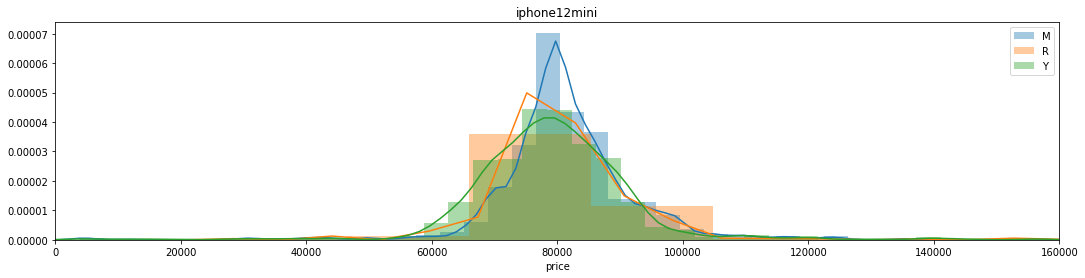

In [62]:
# フリマによる違いはあるか
brands = df.sort_values("relese_date")["brand"].unique()
data_types = df["data_type"].unique()

for brand in brands:
    data = df[df["brand"] == brand]
    mid  = data["price"].median()
    max_lim = mid * 2
    if len(data) < 1000: continue

    plt.figure(figsize=(18,4))
    for data_type in data_types:
        sns.distplot(data[data["data_type"] == data_type]["price"], label=data_type)
        plt.title(brand)
    plt.xlim(0, max_lim)
    plt.legend()
    plt.show()

In [114]:
from sklearn.cluster import KMeans
brands_map = {brand:i for i,brand in enumerate(brands)}

train = df[["brand", "item_condition", "price"]]
train["brand"] = train["brand"].map(brands_map)

/Users/keisuke.nakazonojdsc.ai1/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [111]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(train[["brand"]])


NameError: name 'train' is not defined